<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/Kp/Kp_results_02_01_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [ ]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [ ]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *

print('VOCAB TYPE:', VOCAB_TYPE)

In [ ]:
from scripts.TRAIN import *
names = names_M5 + ['Kp']
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    p = train_mt(names, model_type, 'Kp+M5', repeat_time=3, retrain=False, uw=True)


Run # 0 for MLP MT	 | save dir:  Kp+M5/MLP_MT_0 | 	--> pre data loaded

Run # 1 for MLP MT	 | save dir:  Kp+M5/MLP_MT_1 | 	--> pre data loaded

Run # 2 for MLP MT	 | save dir:  Kp+M5/MLP_MT_2 | 	--> pre data loaded
repeated num # 3 idx 1 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.783$\pm$0.014  &0.784$\pm$0.014  &0.749$\pm$0.015  &0.792$\pm$0.015  &0.775$\pm$0.014  &0.770$\pm$0.015  &0.853$\pm$0.010  &0.566$\pm$0.028  &0.812$\pm$0.011  
 idx 1: &0.797            &0.798            &0.766            &0.804            &0.792            &0.785            &0.864            &0.594            &0.817            

******************** CYP2D6_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mc

# RESULTS for Kp

## Kp only

In [ ]:
folder_name = 'Kp/'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_ST_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, 'Kp', metrics_dict={})



 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&7.032$\pm$0.237  &149.006$\pm$14.536  &12.193$\pm$0.586  &0.211$\pm$0.077  
 idx 1: &6.891            &138.573            &11.772            &0.266            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&7.592$\pm$0.981  &119.477$\pm$23.825  &10.871$\pm$1.136  &0.315$\pm$0.137  
 idx 1: &6.244            &85.922            &9.269            &0.508            


 ============================== GIN ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |   

## Kp + M5

In [20]:
folder_name = 'Kp+M5/'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_MT_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, 'Kp', metrics_dict={})



 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&6.304$\pm$0.281  &157.793$\pm$3.373  &12.561$\pm$0.135  &0.164$\pm$0.018  
 idx 1: &5.936            &160.165            &12.656            &0.152            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 0 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&5.464$\pm$0.643  &108.349$\pm$27.048  &10.333$\pm$1.259  &0.426$\pm$0.143  
 idx 0: &4.648            &85.498            &9.246            &0.547            


 ============================== GIN ==============================
repeated num # 3 idx 0 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |    

# Kp + A3

In [ ]:
folder_name = 'Kp+A3/'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_MT_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, 'Kp', metrics_dict={})



 ============================== MLP ==============================
repeated num # 3 idx 2 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&5.985$\pm$0.227  &137.201$\pm$3.043  &11.713$\pm$0.130  &0.274$\pm$0.016  
 idx 2: &5.792            &136.197            &11.670            &0.279            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&6.052$\pm$0.079  &145.145$\pm$7.770  &12.043$\pm$0.324  &0.231$\pm$0.041  
 idx 1: &6.162            &153.893            &12.405            &0.185            


 ============================== GIN ==============================
repeated num # 3 idx 2 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |   

## KP + AD4

In [13]:
folder_name = 'Kp+AD4/'
# folder_name = 'Kp+M5+AD4+T3'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_MT_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, 'Kp', metrics_dict={})



 ============================== MLP ==============================
repeated num # 3 idx 0 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&5.570$\pm$0.428  &137.382$\pm$6.865  &11.717$\pm$0.296  &0.273$\pm$0.036  
 idx 0: &4.970            &127.687            &11.300            &0.324            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 0 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&5.941$\pm$0.444  &137.733$\pm$13.782  &11.721$\pm$0.596  &0.271$\pm$0.073  
 idx 0: &5.433            &118.888            &10.904            &0.370            


 ============================== GIN ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |  

## Kp + M5 + AD4

In [19]:
folder_name = 'Kp+M5+AD4/'
# folder_name = 'Kp+M5+AD4+T3'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        try:
            file_name = folder_name + model_type + '_MT_' + str(i) + '.yml'
            p = yml_report(file_name)
            perfs.append(p)
        except: pass

    if len(perfs)!= 0:
        eval_perf_list(perfs, 'Kp', metrics_dict={})



 ============================== MLP ==============================
repeated num # 3 idx 0 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&5.601$\pm$0.146  &141.098$\pm$4.595  &11.877$\pm$0.195  &0.253$\pm$0.024  
 idx 0: &5.506            &143.626            &11.984            &0.239            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 0 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&6.065$\pm$0.268  &145.665$\pm$3.828  &12.068$\pm$0.158  &0.229$\pm$0.020  
 idx 0: &6.433            &150.991            &12.288            &0.201            


 ============================== GIN ==============================
******************** Kp ******************** 
	|  mae  |  mse  |  rmse  |  r2  
single: &4.968   &96.308   &9.814   &0.490   

 ==================

## Kp + M5 + AD4 + T3

In [15]:
folder_name = 'Kp+M5+AD4+T3/'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print('\n','='*30, model_type, '='*30)
    perfs = []
    for i in range(3):
        file_name = folder_name + model_type + '_MT_' + str(i) + '.yml'
        p = yml_report(file_name)
        perfs.append(p)
    eval_perf_list(perfs, 'Kp', metrics_dict={})



 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&6.524$\pm$0.339  &142.138$\pm$8.274  &11.917$\pm$0.346  &0.247$\pm$0.044  
 idx 1: &7.003            &140.827            &11.867            &0.254            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 2 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |       r2      
	&5.944$\pm$0.059  &132.100$\pm$10.644  &11.484$\pm$0.469  &0.301$\pm$0.056  
 idx 2: &5.864            &117.310            &10.831            &0.379            


 ============================== GIN ==============================
repeated num # 3 idx 2 has the lowest loss
******************** Kp ******************** 
	|       mae      |       mse      |       rmse      |  

Found local copy...
Loading...


path: Kp+AD4 is created

Run # 0 for MLP MT	 | save dir:  Kp+AD4/MLP_MT_0 | 	cannot open Kp+AD4/MLP_MT_0.yml, retrain
collect data for:  ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB', 'Kp']


Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!



START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138

START scaling train valid test data set: 
---> scale Kp | min 0.014 | max 135.460
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5], 'Solubility_AqSolDB': [-13.1719, 2.1376816201], 'Kp': [0.0139545499259114, 135.4599736770797]} 

---> loader for ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB', 'Kp']
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
Model type:  MLP | Model parameters:  32453
Start training MLP...
Epoch:0 [Train] Loss: 0.385 | [Valid] Loss: 0.429	SAVE MODEL: loss: inf -> 0.42

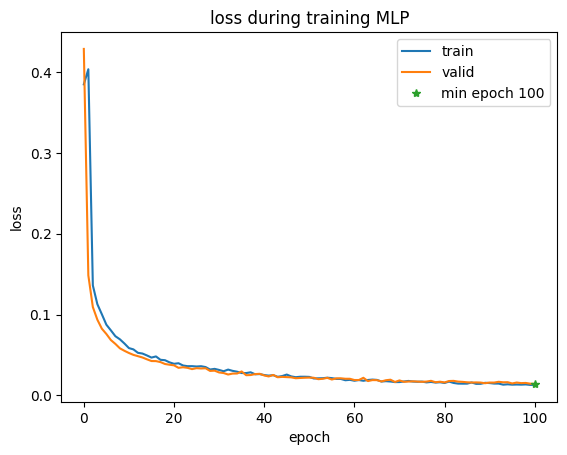

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.877  &0.768  &0.867  &0.987  &0.549  &0.923 &0.927 &0.655 &0.971

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.754 &  nan &0.923

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.688  &0.783  &0.885  &0.456

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.082  &2.104  &1.450  &0.604

*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.836  &117.171  &10.825  &0.328

Epoch:101 [Train] Loss: 0.012 | [Valid] Loss: 0.015	EarlyStopping counter: 1 out of 30
Epoch:102 [Train] Loss: 0.013 | [Valid] Loss: 0.015	EarlyStopping counter: 2 out of 30
Epoch:103 [Train] Loss: 0.013 | [Valid] Loss: 0.015	EarlyStopping counter: 3 out of 30
Epoch:104 [Train] Loss: 0.013 | [Valid] Loss: 0.015

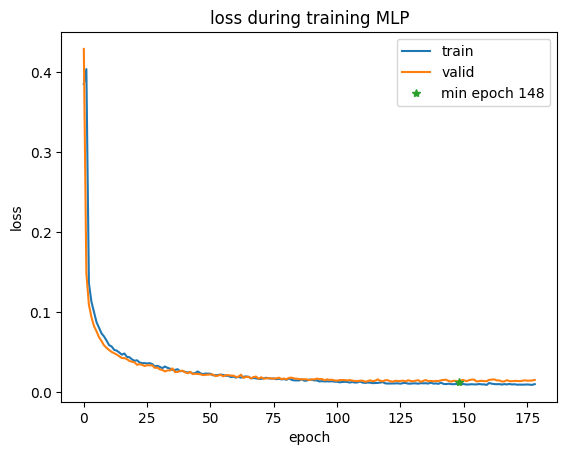

load pretrained model from  Kp+AD4/MLP_MT_0.pt
[Test] Loss: 0.023
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.726  &0.847  &0.967  &0.485  &0.903 &0.862 &0.555 &0.933


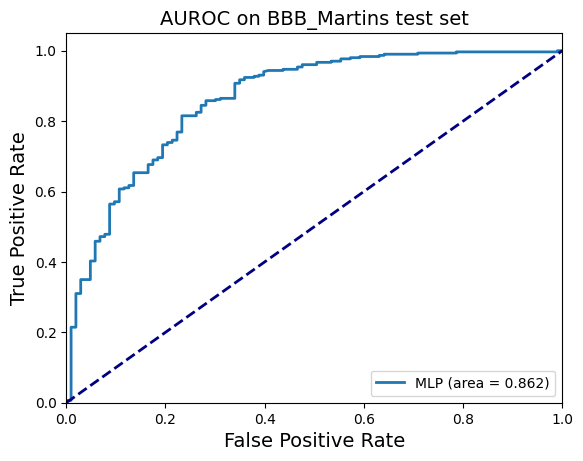

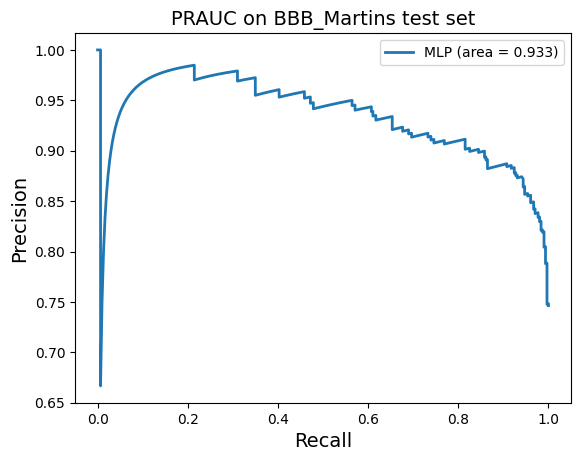


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.843  &0.524  &0.852  &0.985  &0.063  &0.914 &0.790 &0.120 &0.948


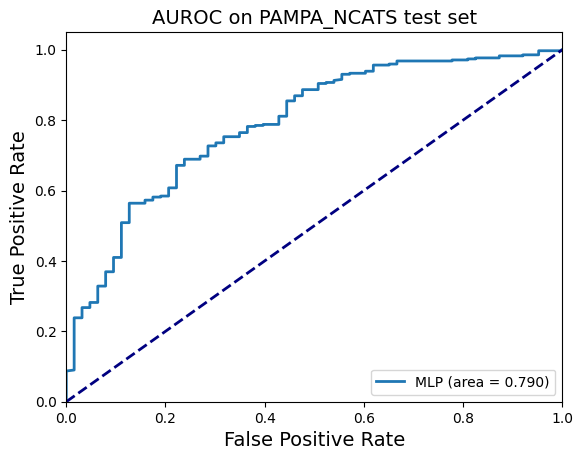

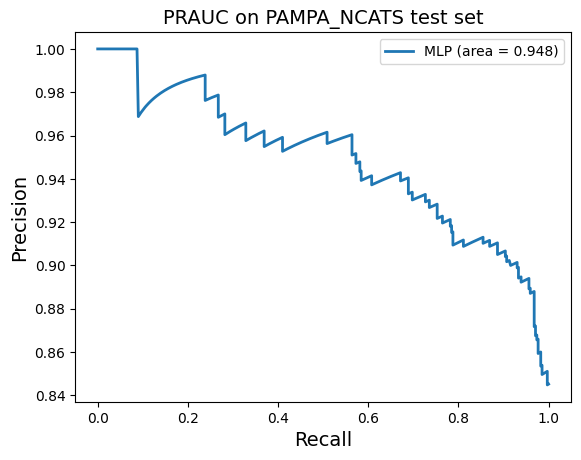


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.689  &0.798  &0.893  &0.461


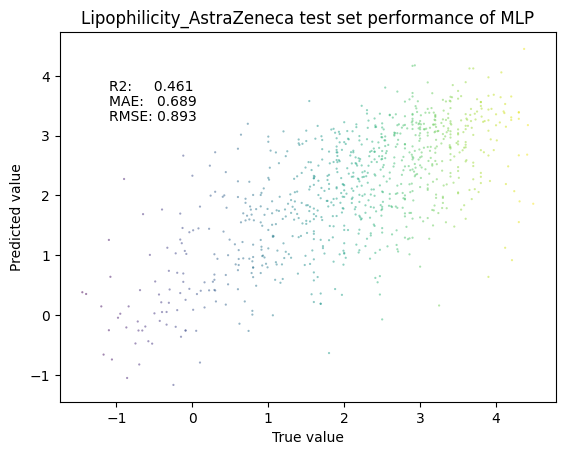


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.013  &1.867  &1.367  &0.656


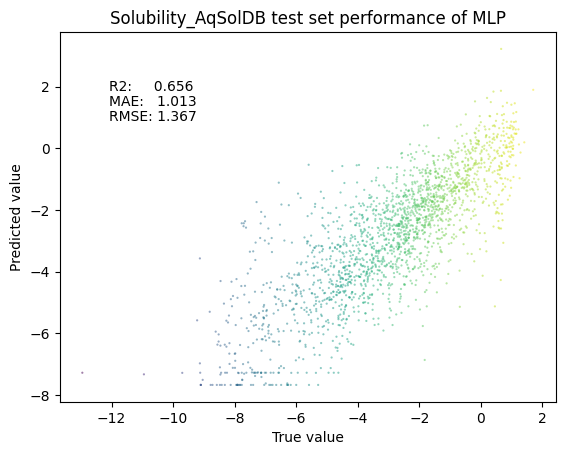


*************** Kp ***************
  MAE     MSE     RMSE    R2
&4.970  &127.687  &11.300  &0.324


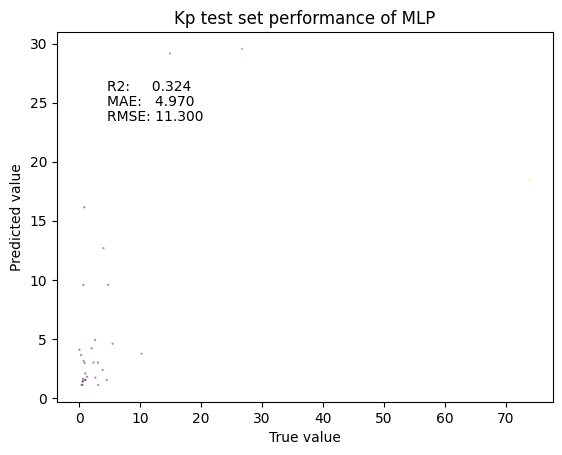



--> Train status saved at Kp+AD4/MLP_MT_0.yml
Finished evaluate test performance, outputs performance dict

Run # 1 for MLP MT	 | save dir:  Kp+AD4/MLP_MT_1 | 	cannot open Kp+AD4/MLP_MT_1.yml, retrain
Model type:  MLP | Model parameters:  32453
Start training MLP...
Epoch:0 [Train] Loss: 0.489 | [Valid] Loss: 0.553	SAVE MODEL: loss: inf -> 0.553 | runtime: 0.214 ms
Epoch:1 [Train] Loss: 0.476 | [Valid] Loss: 0.122	SAVE MODEL: loss: 0.553 -> 0.122 | runtime: 0.213 ms
Epoch:2 [Train] Loss: 0.131 | [Valid] Loss: 0.105	SAVE MODEL: loss: 0.122 -> 0.105 | runtime: 0.225 ms
Epoch:3 [Train] Loss: 0.116 | [Valid] Loss: 0.095	SAVE MODEL: loss: 0.105 -> 0.095 | runtime: 0.210 ms
Epoch:4 [Train] Loss: 0.107 | [Valid] Loss: 0.085	SAVE MODEL: loss: 0.095 -> 0.085 | runtime: 0.206 ms
Epoch:5 [Train] Loss: 0.095 | [Valid] Loss: 0.079	SAVE MODEL: loss: 0.085 -> 0.079 | runtime: 0.210 ms
Epoch:6 [Train] Loss: 0.086 | [Valid] Loss: 0.071	SAVE MODEL: loss: 0.079 -> 0.071 | runtime: 0.213 ms
Epoch:7 [Tra

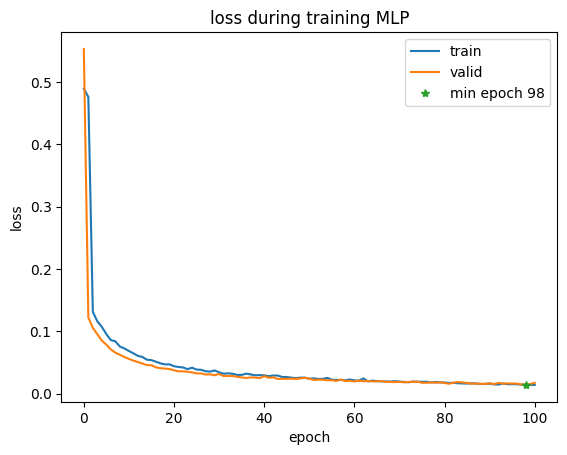

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.877  &0.755  &0.859  &1.000  &0.510  &0.924 &0.933 &0.662 &0.973

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.744 &  nan &0.932

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.720  &0.829  &0.911  &0.423

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.079  &2.046  &1.431  &0.614

*************** Kp ***************
  MAE     MSE     RMSE    R2
&7.095  &129.398  &11.375  &0.258

Epoch:101 [Train] Loss: 0.014 | [Valid] Loss: 0.015	EarlyStopping counter: 3 out of 30
Epoch:102 [Train] Loss: 0.014 | [Valid] Loss: 0.014	SAVE MODEL: loss: 0.015 -> 0.014 | runtime: 0.221 ms
Epoch:103 [Train] Loss: 0.014 | [Valid] Loss: 0.015	EarlyStopping counter: 1 out of 30
Epoch:104 [Train] Loss: 0.014 | [

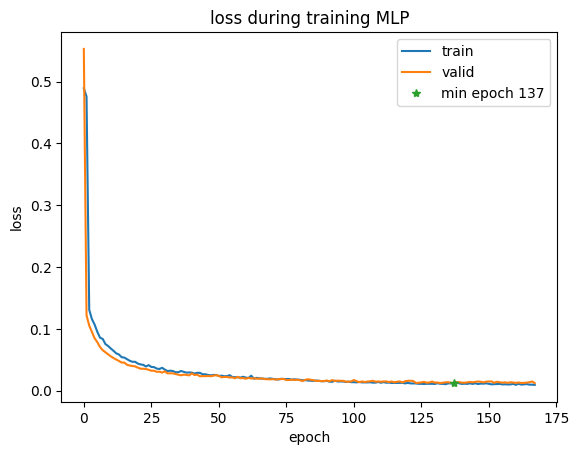

load pretrained model from  Kp+AD4/MLP_MT_1.pt
[Test] Loss: 0.023
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.840  &0.713  &0.840  &0.970  &0.456  &0.900 &0.867 &0.538 &0.943


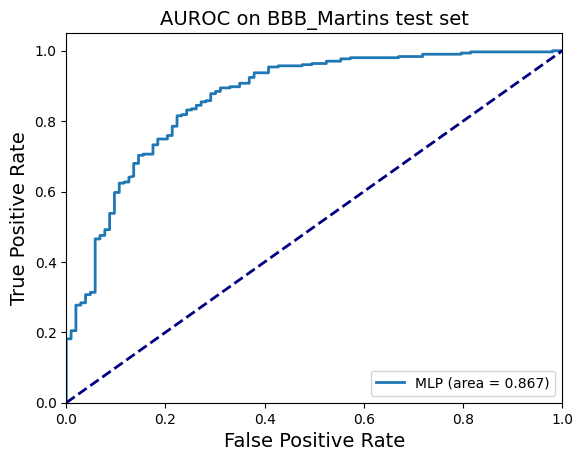

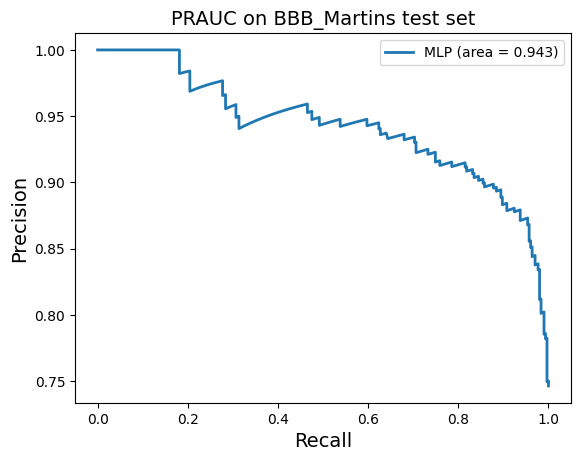


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.783 &  nan &0.946


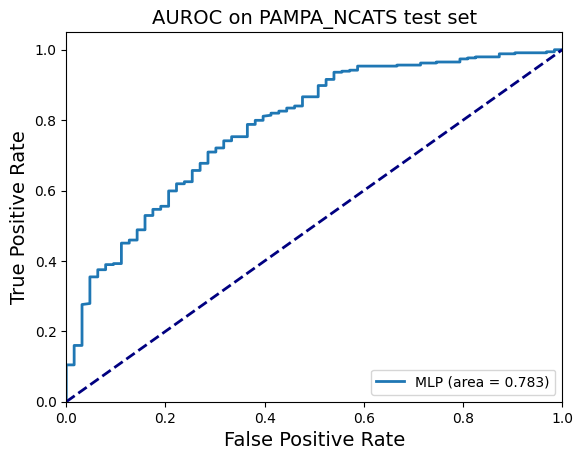

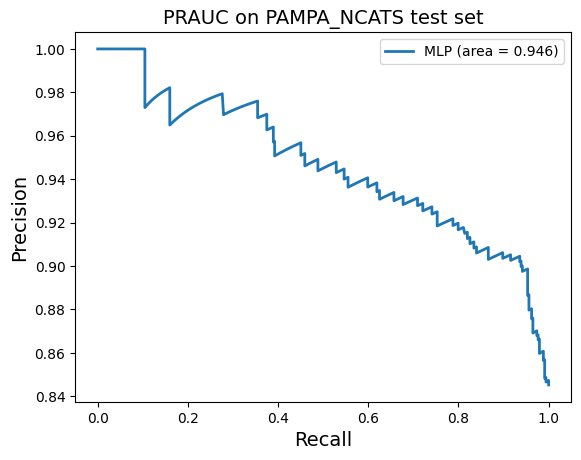


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.697  &0.798  &0.894  &0.461


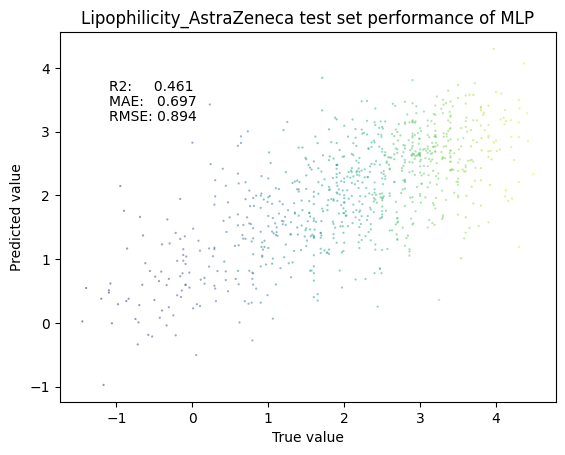


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.998  &1.803  &1.343  &0.668


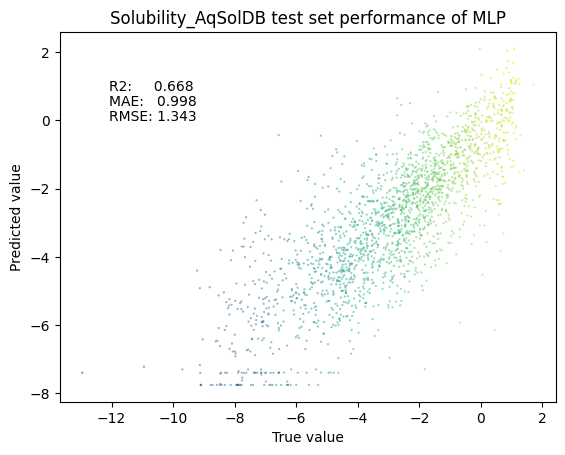


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.800  &141.777  &11.907  &0.249


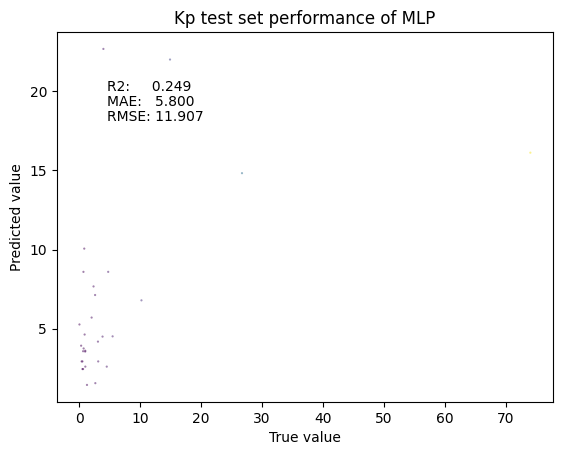



--> Train status saved at Kp+AD4/MLP_MT_1.yml
Finished evaluate test performance, outputs performance dict

Run # 2 for MLP MT	 | save dir:  Kp+AD4/MLP_MT_2 | 	cannot open Kp+AD4/MLP_MT_2.yml, retrain
Model type:  MLP | Model parameters:  32453
Start training MLP...
Epoch:0 [Train] Loss: 0.476 | [Valid] Loss: 0.519	SAVE MODEL: loss: inf -> 0.519 | runtime: 0.200 ms
Epoch:1 [Train] Loss: 0.502 | [Valid] Loss: 0.251	SAVE MODEL: loss: 0.519 -> 0.251 | runtime: 0.200 ms
Epoch:2 [Train] Loss: 0.234 | [Valid] Loss: 0.171	SAVE MODEL: loss: 0.251 -> 0.171 | runtime: 0.211 ms
Epoch:3 [Train] Loss: 0.168 | [Valid] Loss: 0.132	SAVE MODEL: loss: 0.171 -> 0.132 | runtime: 0.202 ms
Epoch:4 [Train] Loss: 0.134 | [Valid] Loss: 0.112	SAVE MODEL: loss: 0.132 -> 0.112 | runtime: 0.205 ms
Epoch:5 [Train] Loss: 0.112 | [Valid] Loss: 0.092	SAVE MODEL: loss: 0.112 -> 0.092 | runtime: 0.204 ms
Epoch:6 [Train] Loss: 0.101 | [Valid] Loss: 0.084	SAVE MODEL: loss: 0.092 -> 0.084 | runtime: 0.224 ms
Epoch:7 [Tra

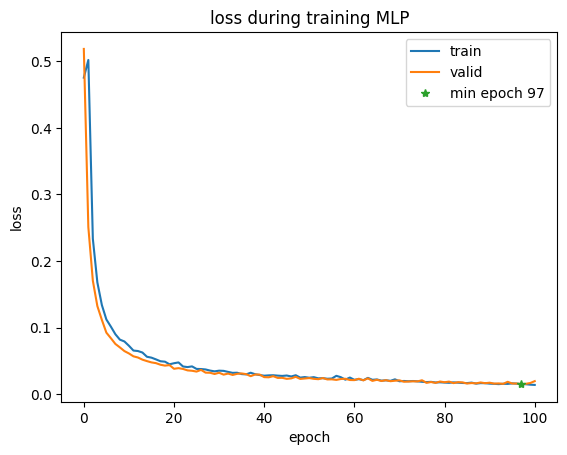

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.872  &0.765  &0.866  &0.980  &0.549  &0.920 &0.918 &0.638 &0.967

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.741 &  nan &0.928

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.815  &1.027  &1.014  &0.285

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.075  &2.033  &1.426  &0.617

*************** Kp ***************
  MAE     MSE     RMSE    R2
&7.397  &148.416  &12.183  &0.149

Epoch:101 [Train] Loss: 0.015 | [Valid] Loss: 0.016	EarlyStopping counter: 4 out of 30
Epoch:102 [Train] Loss: 0.013 | [Valid] Loss: 0.017	EarlyStopping counter: 5 out of 30
Epoch:103 [Train] Loss: 0.014 | [Valid] Loss: 0.015	EarlyStopping counter: 6 out of 30
Epoch:104 [Train] Loss: 0.014 | [Valid] Loss: 0.017

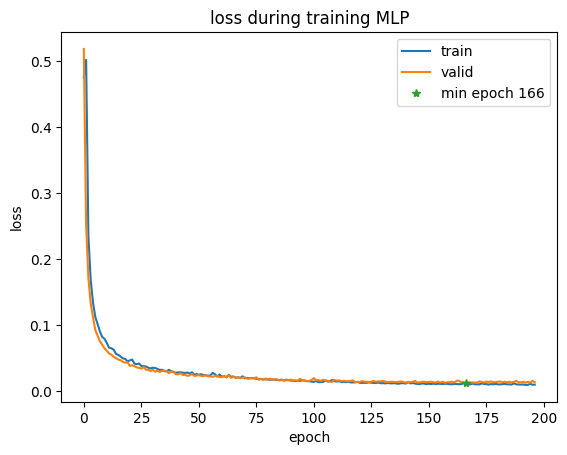

load pretrained model from  Kp+AD4/MLP_MT_2.pt
[Test] Loss: 0.023
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.850  &0.749  &0.860  &0.954  &0.544  &0.905 &0.868 &0.573 &0.944


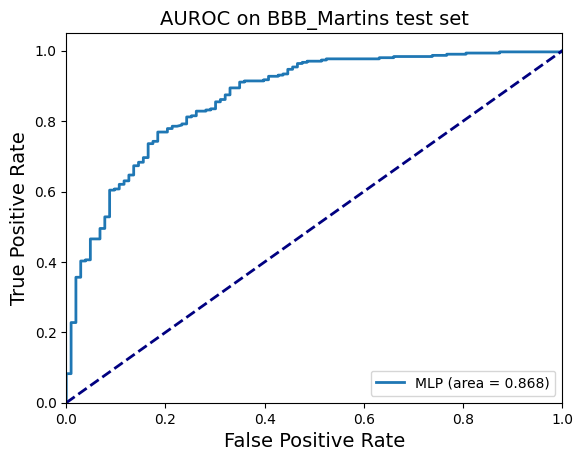

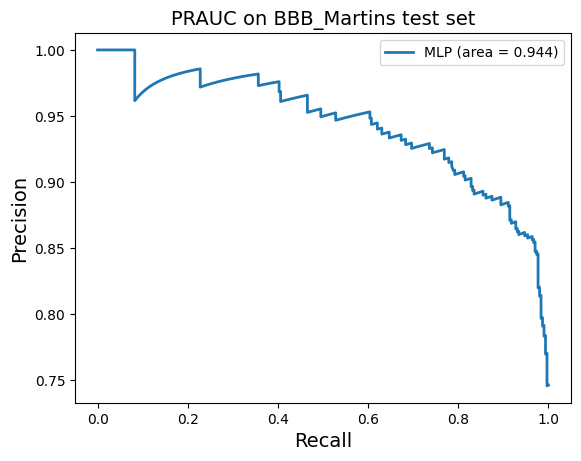


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.766 &  nan &0.943


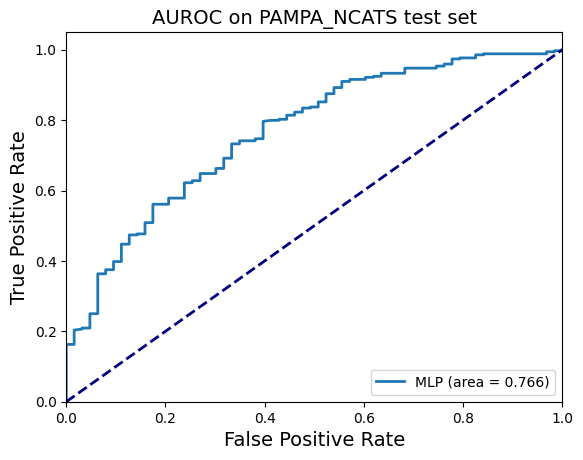

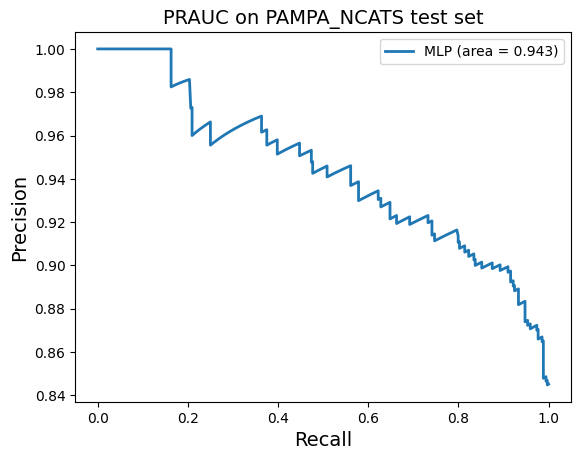


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.702  &0.796  &0.892  &0.463


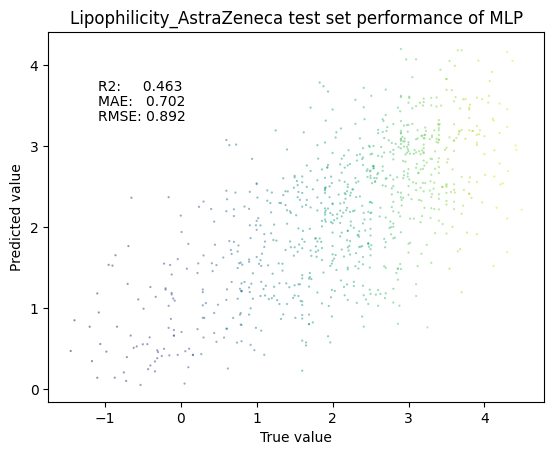


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.995  &1.776  &1.333  &0.673


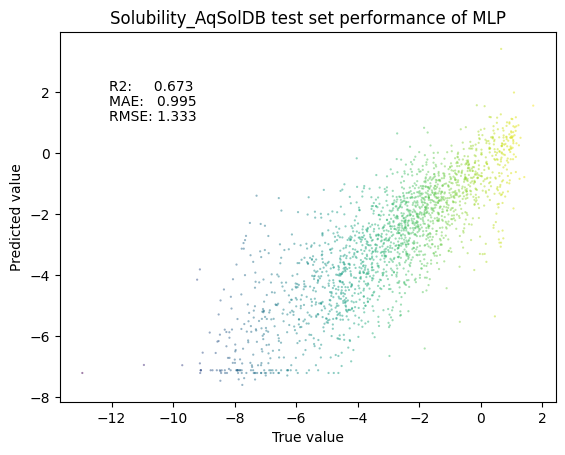


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.940  &142.681  &11.945  &0.245


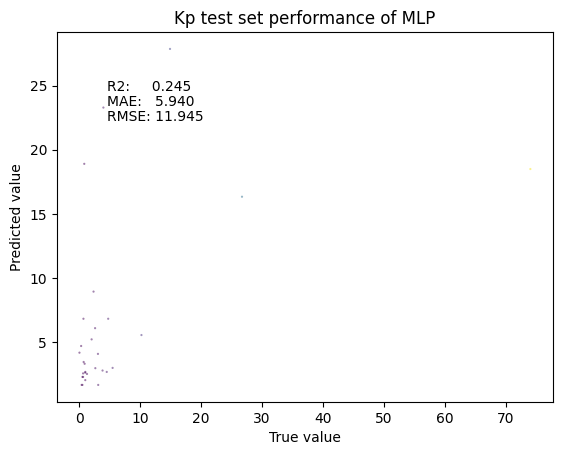

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!




--> Train status saved at Kp+AD4/MLP_MT_2.yml
Finished evaluate test performance, outputs performance dict
repeated num # 3 idx 0 has the lowest loss
******************** BBB_Martins ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.845$\pm$0.004  &0.729$\pm$0.015  &0.849$\pm$0.008  &0.964$\pm$0.007  &0.495$\pm$0.036  &0.903$\pm$0.002  &0.866$\pm$0.003  &0.555$\pm$0.014  &0.940$\pm$0.005  
 idx 0: &0.845            &0.726            &0.847            &0.967            &0.485            &0.903            &0.862            &0.555            &0.933            

******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.844$\pm$0.001  &0.508$\pm$0.012  &0.847$\pm$0.003  &0.995$\pm$0.007  &0.021$\pm$0.

Found local copy...
Loading...
Done!



START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138

START scaling train valid test data set: 
---> scale Kp | min 0.014 | max 135.460
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5], 'Solubility_AqSolDB': [-13.1719, 2.1376816201], 'Kp': [0.0139545499259114, 135.4599736770797]} 

---> loader for ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB', 'Kp']
--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.6s
[Parallel(n_jobs=10)]: Done 1940 tasks      | elapsed:    8.6s
[Parallel(n_jobs=10)]: Done 9940 tasks      | elapsed:   15.6s
[Parallel(n_jobs=10)]: Done 12680 out of 12680 | elapsed:   17.7s finished


--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1680 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 1842 out of 1842 | elapsed:    1.6s finished


--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1900 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 3655 out of 3655 | elapsed:    3.8s finished


Model type:  AttentiveFP | Model parameters:  3824711
Start training AttentiveFP...
Epoch:0 [Train] Loss: 0.288 | [Valid] Loss: 0.327	SAVE MODEL: loss: inf -> 0.327 | runtime: 0.551 ms
Epoch:1 [Train] Loss: 0.308 | [Valid] Loss: 0.114	SAVE MODEL: loss: 0.327 -> 0.114 | runtime: 0.296 ms
Epoch:2 [Train] Loss: 0.122 | [Valid] Loss: 0.099	SAVE MODEL: loss: 0.114 -> 0.099 | runtime: 0.285 ms
Epoch:3 [Train] Loss: 0.106 | [Valid] Loss: 0.086	SAVE MODEL: loss: 0.099 -> 0.086 | runtime: 0.288 ms
Epoch:4 [Train] Loss: 0.091 | [Valid] Loss: 0.078	SAVE MODEL: loss: 0.086 -> 0.078 | runtime: 0.296 ms
Epoch:5 [Train] Loss: 0.080 | [Valid] Loss: 0.069	SAVE MODEL: loss: 0.078 -> 0.069 | runtime: 0.287 ms
Epoch:6 [Train] Loss: 0.072 | [Valid] Loss: 0.061	SAVE MODEL: loss: 0.069 -> 0.061 | runtime: 0.289 ms
Epoch:7 [Train] Loss: 0.068 | [Valid] Loss: 0.056	SAVE MODEL: loss: 0.061 -> 0.056 | runtime: 0.294 ms
Epoch:8 [Train] Loss: 0.062 | [Valid] Loss: 0.054	SAVE MODEL: loss: 0.056 -> 0.054 | runtime: 

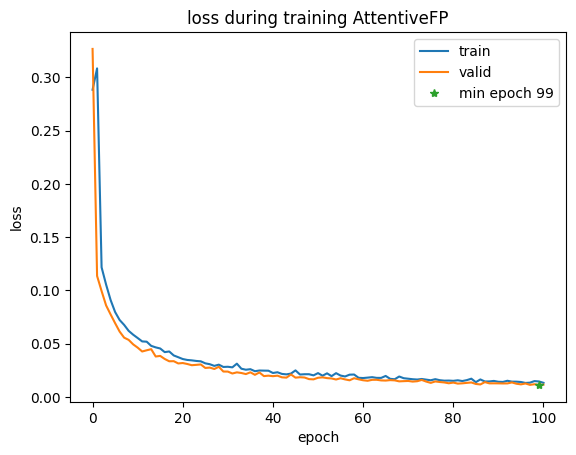

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.887  &0.807  &0.891  &0.967  &0.647  &0.927 &0.921 &0.683 &0.965

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.842  &0.527  &0.845  &0.994  &0.061  &0.914 &0.765 &0.167 &0.908

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.508  &0.414  &0.643  &0.712

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.739  &1.095  &1.047  &0.794

*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.972  &117.071  &10.820  &0.329

Epoch:101 [Train] Loss: 0.014 | [Valid] Loss: 0.012	EarlyStopping counter: 2 out of 30
Epoch:102 [Train] Loss: 0.014 | [Valid] Loss: 0.012	EarlyStopping counter: 3 out of 30
Epoch:103 [Train] Loss: 0.013 | [Valid] Loss: 0.012	EarlyStopping counter: 4 out of 30
Epoch:104 [Train] Loss: 0.014 | [Valid] Loss: 0.013

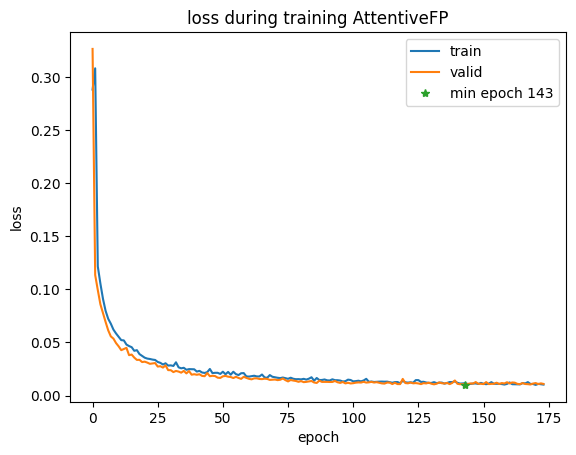

load pretrained model from  Kp+AD4/AttentiveFP_MT_0.pt
[Test] Loss: 0.022
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.749  &0.861  &0.944  &0.553  &0.901 &0.876 &0.560 &0.947


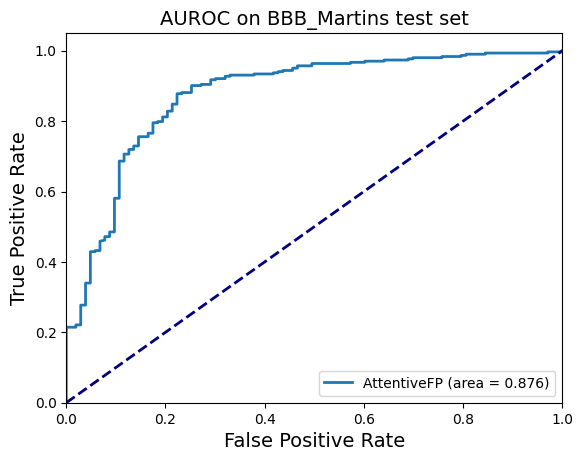

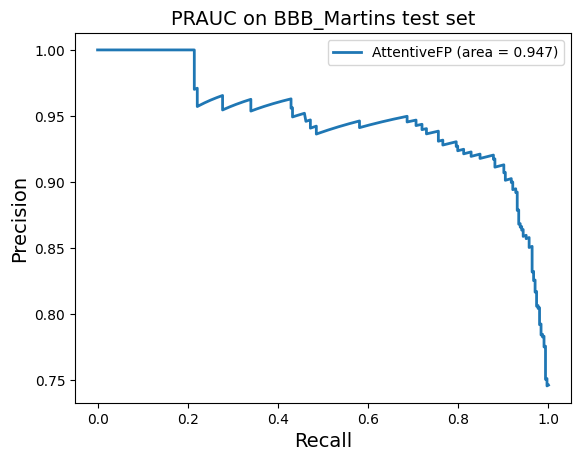


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.857  &0.605  &0.874  &0.971  &0.238  &0.920 &0.772 &0.315 &0.943


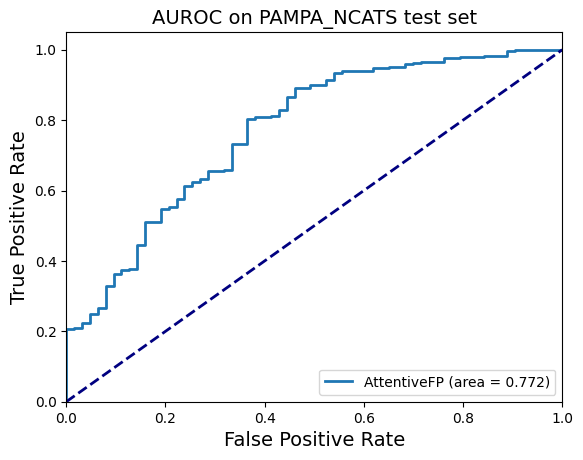

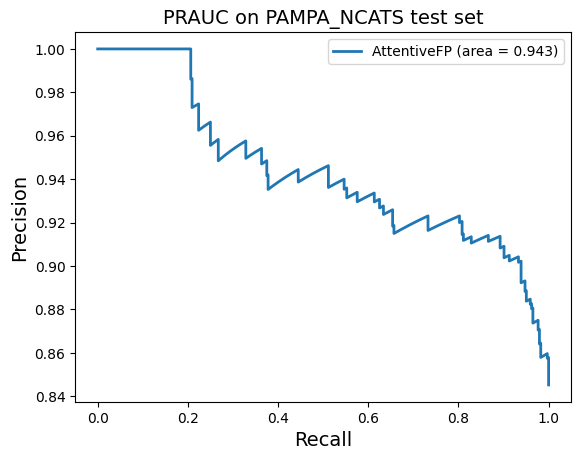


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.503  &0.421  &0.649  &0.716


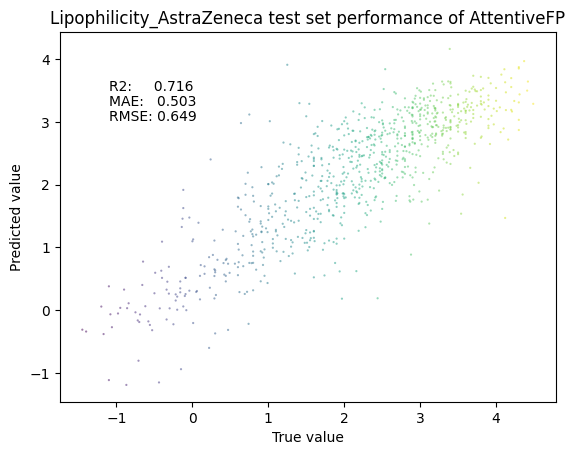


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.722  &1.036  &1.018  &0.809


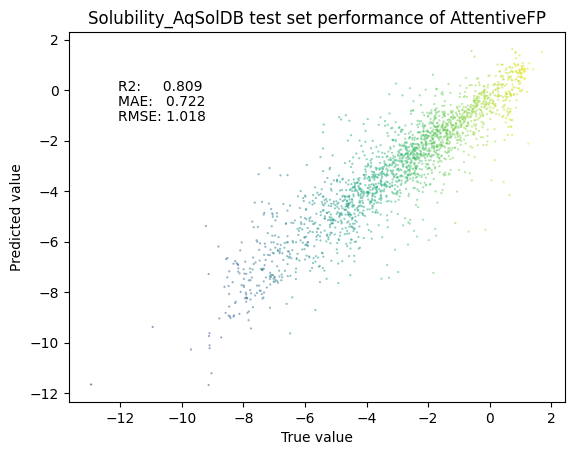


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.433  &118.888  &10.904  &0.370


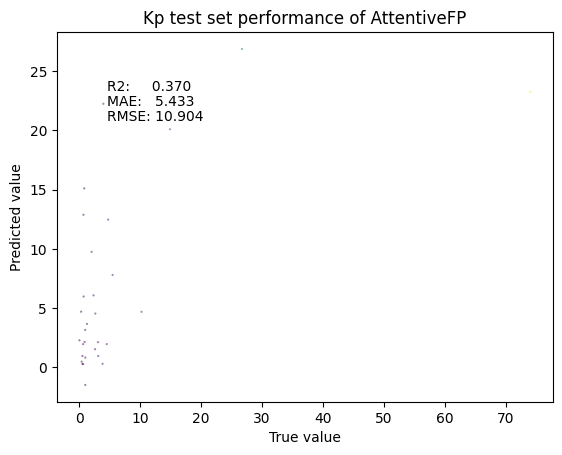



--> Train status saved at Kp+AD4/AttentiveFP_MT_0.yml
Finished evaluate test performance, outputs performance dict

Run # 1 for AttentiveFP MT	 | save dir:  Kp+AD4/AttentiveFP_MT_1 | 	cannot open Kp+AD4/AttentiveFP_MT_1.yml, retrain
Model type:  AttentiveFP | Model parameters:  3824711
Start training AttentiveFP...
Epoch:0 [Train] Loss: 0.291 | [Valid] Loss: 0.321	SAVE MODEL: loss: inf -> 0.321 | runtime: 0.308 ms
Epoch:1 [Train] Loss: 0.311 | [Valid] Loss: 0.122	SAVE MODEL: loss: 0.321 -> 0.122 | runtime: 0.310 ms
Epoch:2 [Train] Loss: 0.124 | [Valid] Loss: 0.102	SAVE MODEL: loss: 0.122 -> 0.102 | runtime: 0.305 ms
Epoch:3 [Train] Loss: 0.104 | [Valid] Loss: 0.088	SAVE MODEL: loss: 0.102 -> 0.088 | runtime: 0.309 ms
Epoch:4 [Train] Loss: 0.092 | [Valid] Loss: 0.080	SAVE MODEL: loss: 0.088 -> 0.080 | runtime: 0.307 ms
Epoch:5 [Train] Loss: 0.084 | [Valid] Loss: 0.072	SAVE MODEL: loss: 0.080 -> 0.072 | runtime: 0.307 ms
Epoch:6 [Train] Loss: 0.075 | [Valid] Loss: 0.065	SAVE MODEL: los

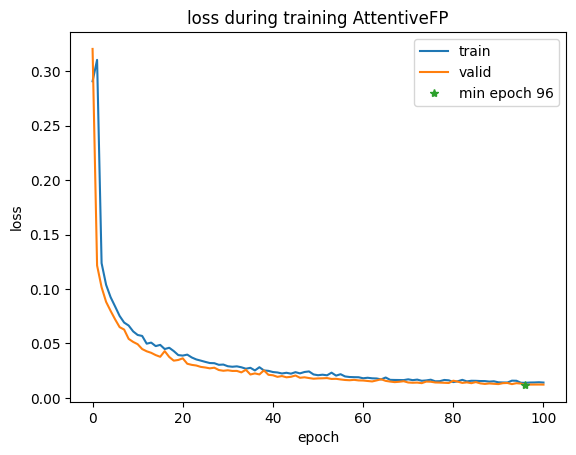

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.877  &0.801  &0.890  &0.954  &0.647  &0.921 &0.912 &0.655 &0.962

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.842  &0.515  &0.842  &1.000  &0.030  &0.914 &0.770 &0.160 &0.917

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.523  &0.433  &0.658  &0.699

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.751  &1.131  &1.064  &0.787

*************** Kp ***************
  MAE     MSE     RMSE    R2
&7.626  &127.782  &11.304  &0.268

Epoch:101 [Train] Loss: 0.014 | [Valid] Loss: 0.012	EarlyStopping counter: 5 out of 30
Epoch:102 [Train] Loss: 0.013 | [Valid] Loss: 0.014	EarlyStopping counter: 6 out of 30
Epoch:103 [Train] Loss: 0.013 | [Valid] Loss: 0.013	EarlyStopping counter: 7 out of 30
Epoch:104 [Train] Loss: 0.013 | [Valid] Loss: 0.013

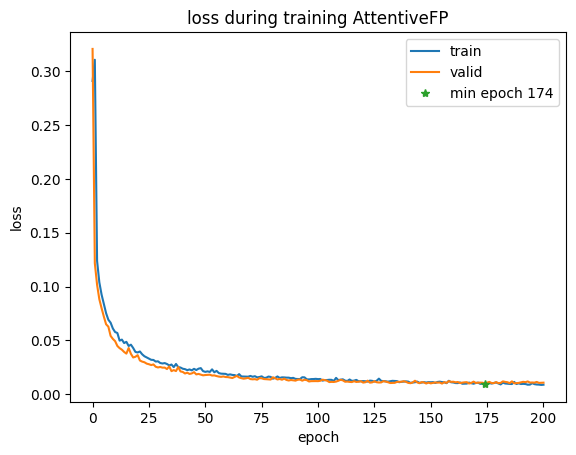

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.877  &0.807  &0.894  &0.947  &0.667  &0.920 &0.910 &0.657 &0.955

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.882  &0.661  &0.884  &0.988  &0.333  &0.933 &0.763 &0.485 &0.925

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.454  &0.346  &0.588  &0.760

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.717  &1.056  &1.028  &0.801

*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.963  &89.992  &9.486  &0.484

Epoch:201 [Train] Loss: 0.010 | [Valid] Loss: 0.011	EarlyStopping counter: 27 out of 30
Epoch:202 [Train] Loss: 0.009 | [Valid] Loss: 0.011	EarlyStopping counter: 28 out of 30
Epoch:203 [Train] Loss: 0.009 | [Valid] Loss: 0.011	EarlyStopping counter: 29 out of 30
Epoch:204 [Train] Loss: 0.009 | [Valid] Loss: 0.01

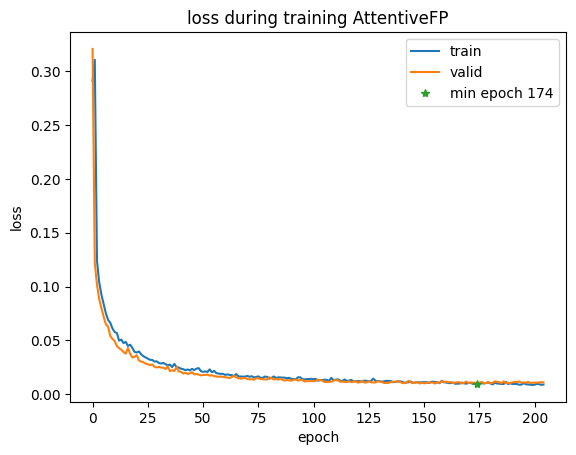

load pretrained model from  Kp+AD4/AttentiveFP_MT_1.pt
[Test] Loss: 0.024
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.745  &0.859  &0.947  &0.544  &0.901 &0.874 &0.559 &0.948


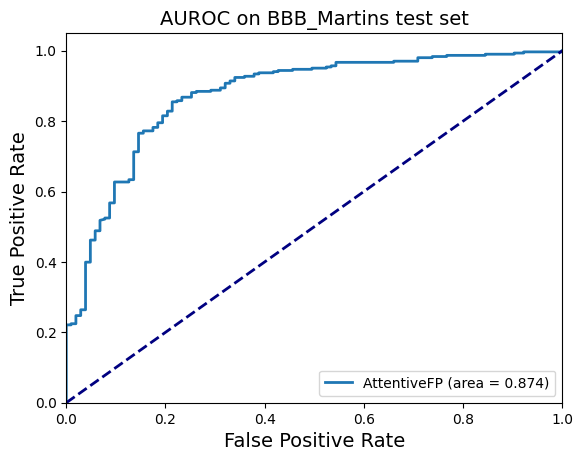

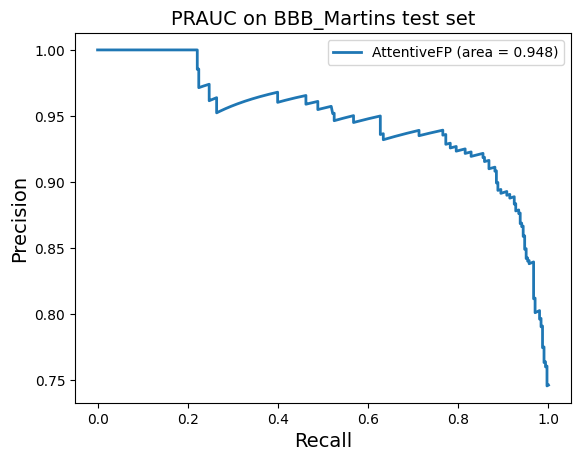


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.862  &0.588  &0.869  &0.985  &0.190  &0.924 &0.794 &0.318 &0.953


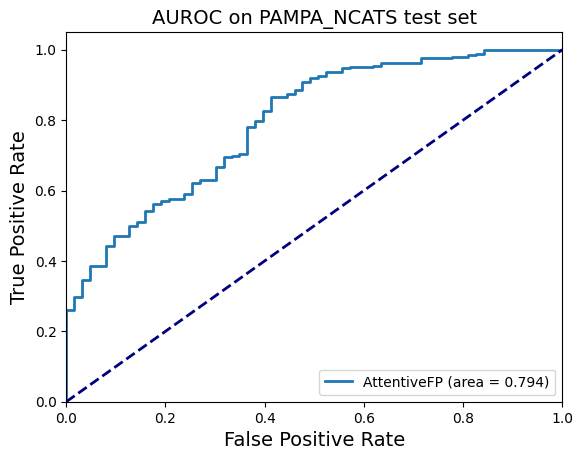

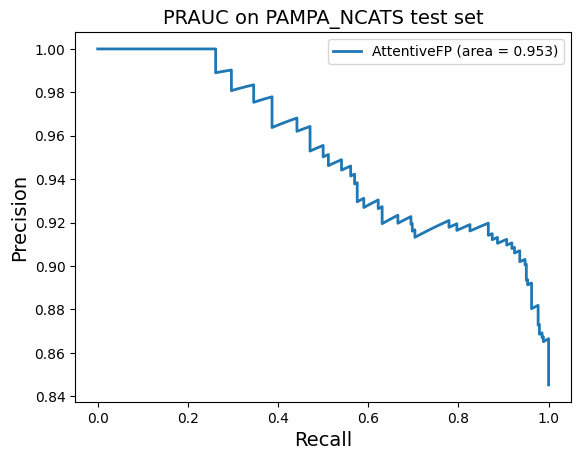


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.482  &0.411  &0.641  &0.723


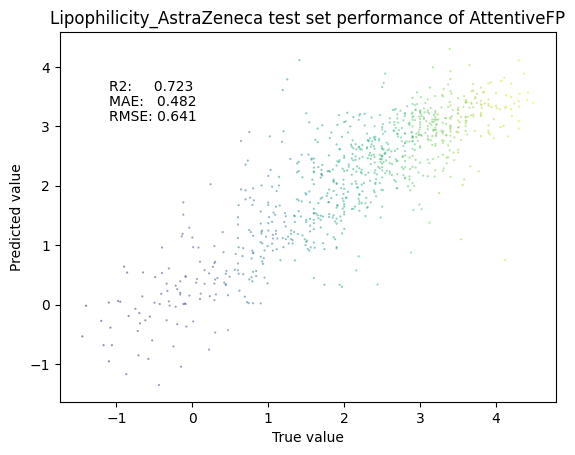


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.700  &1.041  &1.020  &0.808


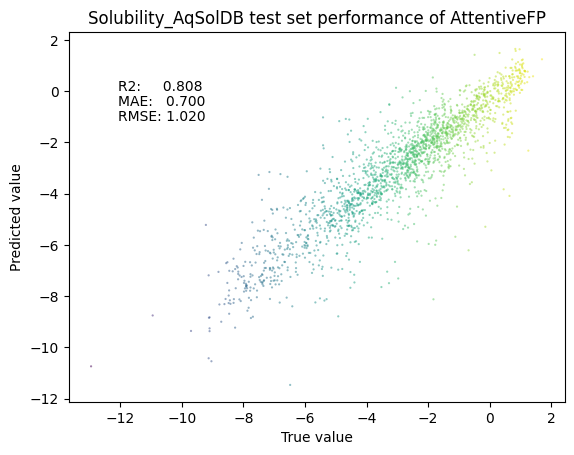


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.875  &142.846  &11.952  &0.244


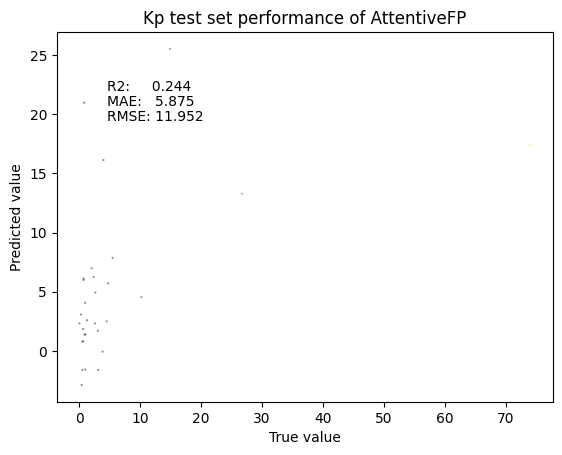



--> Train status saved at Kp+AD4/AttentiveFP_MT_1.yml
Finished evaluate test performance, outputs performance dict

Run # 2 for AttentiveFP MT	 | save dir:  Kp+AD4/AttentiveFP_MT_2 | 	cannot open Kp+AD4/AttentiveFP_MT_2.yml, retrain
Model type:  AttentiveFP | Model parameters:  3824711
Start training AttentiveFP...
Epoch:0 [Train] Loss: 0.301 | [Valid] Loss: 0.317	SAVE MODEL: loss: inf -> 0.317 | runtime: 0.312 ms
Epoch:1 [Train] Loss: 0.309 | [Valid] Loss: 0.115	SAVE MODEL: loss: 0.317 -> 0.115 | runtime: 0.310 ms
Epoch:2 [Train] Loss: 0.126 | [Valid] Loss: 0.103	SAVE MODEL: loss: 0.115 -> 0.103 | runtime: 0.307 ms
Epoch:3 [Train] Loss: 0.105 | [Valid] Loss: 0.087	SAVE MODEL: loss: 0.103 -> 0.087 | runtime: 0.313 ms
Epoch:4 [Train] Loss: 0.096 | [Valid] Loss: 0.092	EarlyStopping counter: 1 out of 30
Epoch:5 [Train] Loss: 0.087 | [Valid] Loss: 0.074	SAVE MODEL: loss: 0.087 -> 0.074 | runtime: 0.306 ms
Epoch:6 [Train] Loss: 0.080 | [Valid] Loss: 0.066	SAVE MODEL: loss: 0.074 -> 0.066 

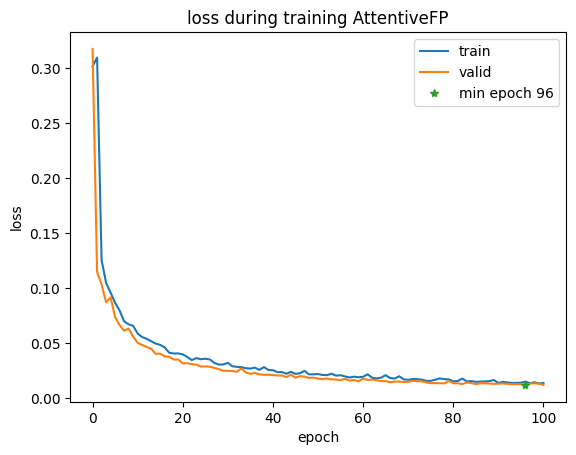

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.882  &0.810  &0.895  &0.954  &0.667  &0.924 &0.909 &0.670 &0.956

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.847  &0.530  &0.846  &1.000  &0.061  &0.916 &0.777 &0.226 &0.913

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.522  &0.459  &0.677  &0.681

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.740  &1.091  &1.045  &0.794

*************** Kp ***************
  MAE     MSE     RMSE    R2
&7.378  &123.876  &11.130  &0.290

Epoch:101 [Train] Loss: 0.014 | [Valid] Loss: 0.011	SAVE MODEL: loss: 0.012 -> 0.011 | runtime: 0.308 ms
Epoch:102 [Train] Loss: 0.014 | [Valid] Loss: 0.012	EarlyStopping counter: 1 out of 30
Epoch:103 [Train] Loss: 0.014 | [Valid] Loss: 0.012	EarlyStopping counter: 2 out of 30
Epoch:104 [Train] Loss: 0.014 | [

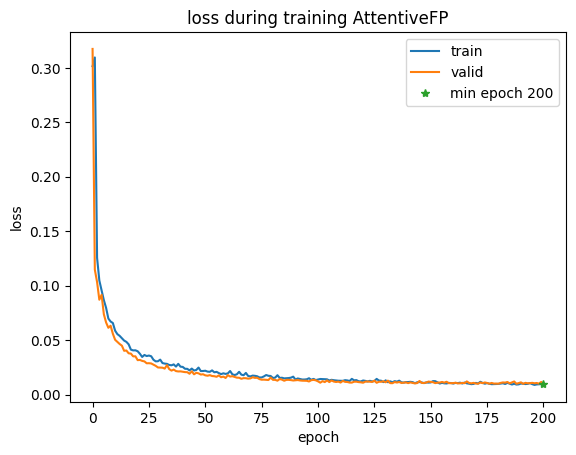

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.887  &0.814  &0.896  &0.961  &0.667  &0.927 &0.924 &0.684 &0.970

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.872  &0.618  &0.871  &0.994  &0.242  &0.929 &0.790 &0.424 &0.935

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.443  &0.335  &0.579  &0.767

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.725  &1.060  &1.030  &0.800

*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.301  &61.940  &7.870  &0.645

Epoch:201 [Train] Loss: 0.009 | [Valid] Loss: 0.010	EarlyStopping counter: 1 out of 30
Epoch:202 [Train] Loss: 0.009 | [Valid] Loss: 0.010	EarlyStopping counter: 2 out of 30
Epoch:203 [Train] Loss: 0.010 | [Valid] Loss: 0.011	EarlyStopping counter: 3 out of 30
Epoch:204 [Train] Loss: 0.009 | [Valid] Loss: 0.010	E

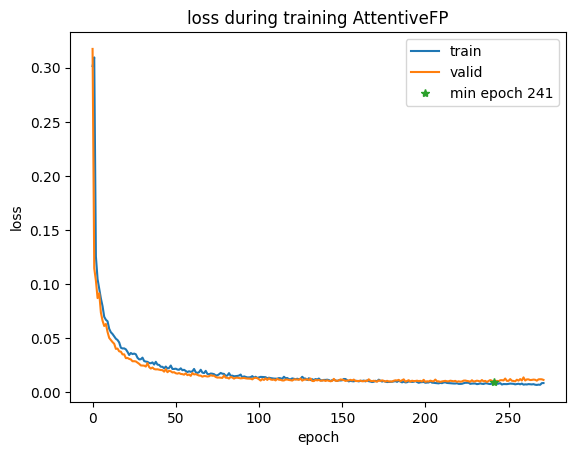

load pretrained model from  Kp+AD4/AttentiveFP_MT_2.pt
[Test] Loss: 0.025
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.840  &0.752  &0.865  &0.931  &0.573  &0.897 &0.849 &0.551 &0.933


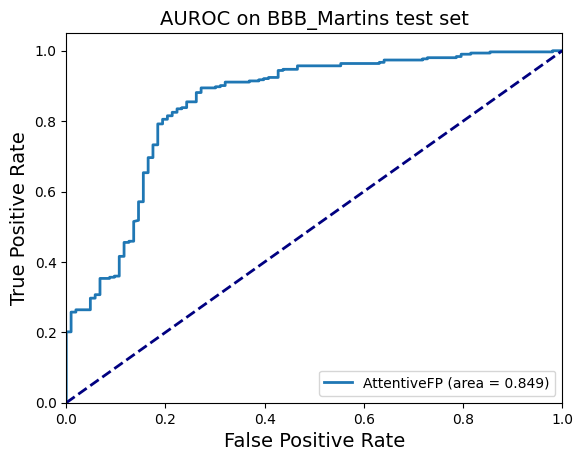

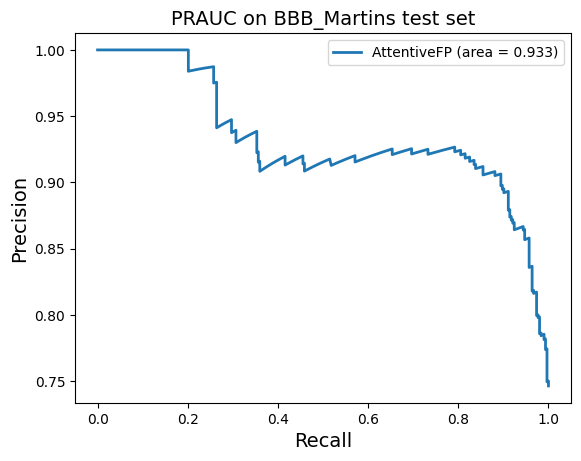


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.875  &0.660  &0.891  &0.971  &0.349  &0.929 &0.822 &0.430 &0.960


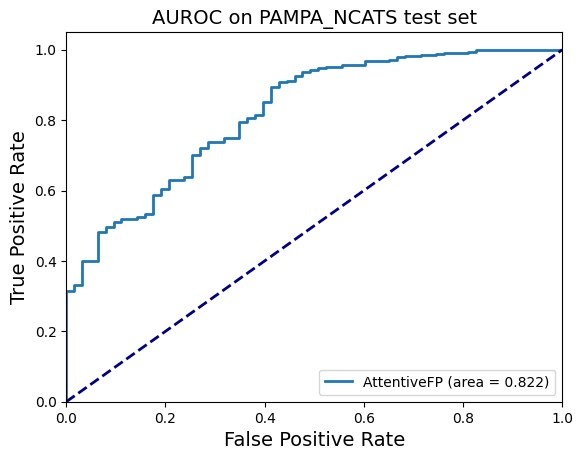

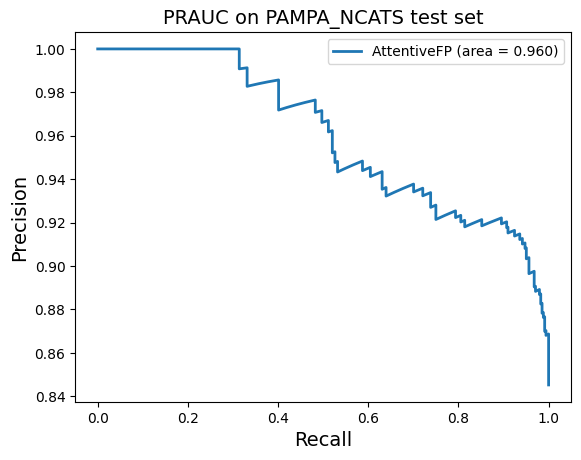


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.479  &0.413  &0.643  &0.721


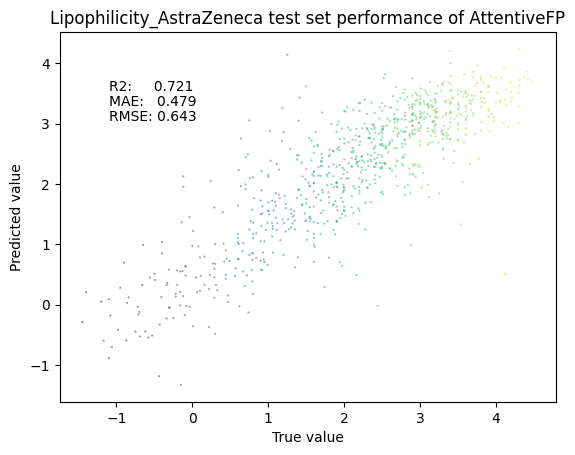


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.711  &1.056  &1.028  &0.805


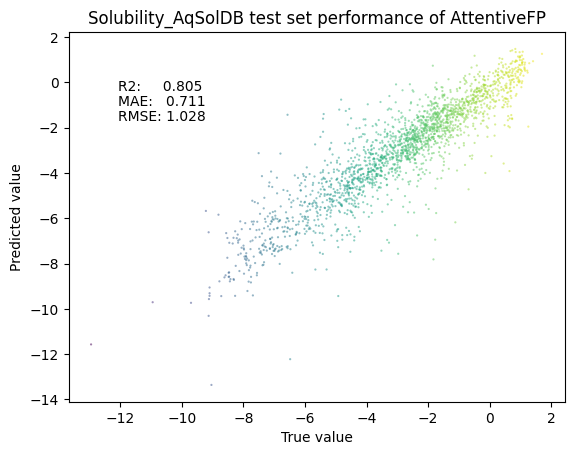


*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.514  &151.464  &12.307  &0.198


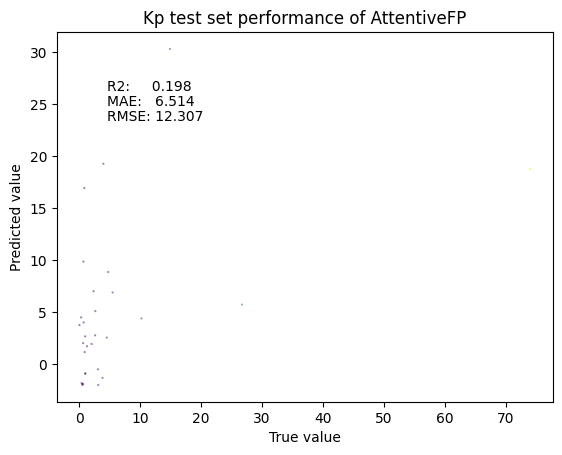



--> Train status saved at Kp+AD4/AttentiveFP_MT_2.yml
Finished evaluate test performance, outputs performance dict
repeated num # 3 idx 0 has the lowest loss
******************** BBB_Martins ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.843$\pm$0.002  &0.749$\pm$0.003  &0.862$\pm$0.002  &0.941$\pm$0.007  &0.557$\pm$0.012  &0.900$\pm$0.002  &0.867$\pm$0.012  &0.557$\pm$0.004  &0.942$\pm$0.007  
 idx 0: &0.845            &0.749            &0.861            &0.944            &0.553            &0.901            &0.876            &0.560            &0.947            

******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.865$\pm$0.007  &0.618$\pm$0.031  &0.878$\pm$0.009  &0.976$\pm$0.007  &0.25

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!



Run # 0 for GIN MT	 | save dir:  Kp+AD4/GIN_MT_0 | 	cannot open Kp+AD4/GIN_MT_0.yml, retrain
collect data for:  ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB', 'Kp']

START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138

START scaling train valid test data set: 
---> scale Kp | min 0.014 | max 135.460
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5], 'Solubility_AqSolDB': [-13.1719, 2.1376816201], 'Kp': [0.0139545499259114, 135.4599736770797]} 

---> loader for ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB', 'Kp']
--> preparing data loader for model type  GIN
--> preparing data loader for model type  GIN
--> preparing data loader for model type  GIN


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:01<00:00, 4.02MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978801
Start training GIN...
Epoch:0 [Train] Loss: 0.430 | [Valid] Loss: 0.456	SAVE MODEL: loss: inf -> 0.456 | runtime: 2.406 ms
Epoch:1 [Train] Loss: 0.371 | [Valid] Loss: 0.112	SAVE MODEL: loss: 0.456 -> 0.112 | runtime: 2.371 ms
Epoch:2 [Train] Loss: 0.119 | [Valid] Loss: 0.095	SAVE MODEL: loss: 0.112 -> 0.095 | runtime: 2.377 ms
Epoch:3 [Train] Loss: 0.107 | [Valid] Loss: 0.087	SAVE MODEL: loss: 0.095 -> 0.087 | runtime: 2.355 ms
Epoch:4 [Train] Loss: 0.096 | [Valid] Loss: 0.076	SAVE MODEL: loss: 0.087 -> 0.076 | runtime: 2.374 ms
Epoch:5 [Train] Loss: 0.090 | [Valid] Loss: 0.068	SAVE MODEL: loss: 0.076 -> 0.068 | runtime: 2.365 ms
Epoch:6 [Train] Loss: 0.080 | [Valid] Loss: 0.064	SAVE MODEL: loss: 0.068 -> 0.064 | runtime: 2.376 ms
Epoch:7 [Train] Loss: 0.074 | [Valid] Loss: 0.058	SAVE MODEL: loss: 0.064 -> 0.058 | runtime: 2.367 ms
Epoch:8 [Train] Loss: 0.070 | [Valid] Loss: 0.052	SAVE MODEL: loss: 0.058 -> 0.052 | r

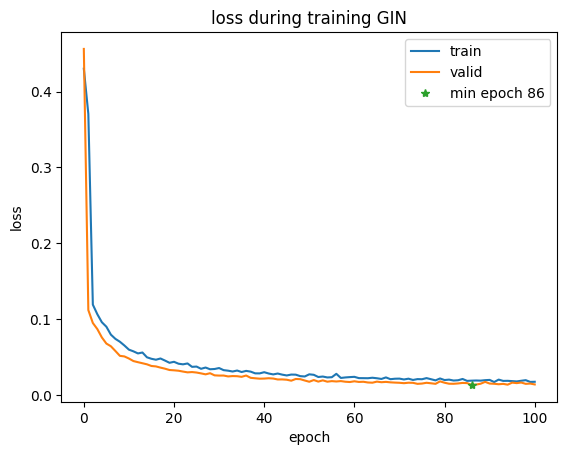

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.872  &0.745  &0.854  &1.000  &0.490  &0.921 &0.905 &0.647 &0.951

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.741 &  nan &0.912

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.602  &0.545  &0.738  &0.621

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.033  &1.911  &1.382  &0.640

*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.430  &96.230  &9.810  &0.448

Epoch:101 [Train] Loss: 0.021 | [Valid] Loss: 0.016	EarlyStopping counter: 15 out of 30
Epoch:102 [Train] Loss: 0.016 | [Valid] Loss: 0.013	EarlyStopping counter: 16 out of 30
Epoch:103 [Train] Loss: 0.018 | [Valid] Loss: 0.015	EarlyStopping counter: 17 out of 30
Epoch:104 [Train] Loss: 0.019 | [Valid] Loss: 0.01

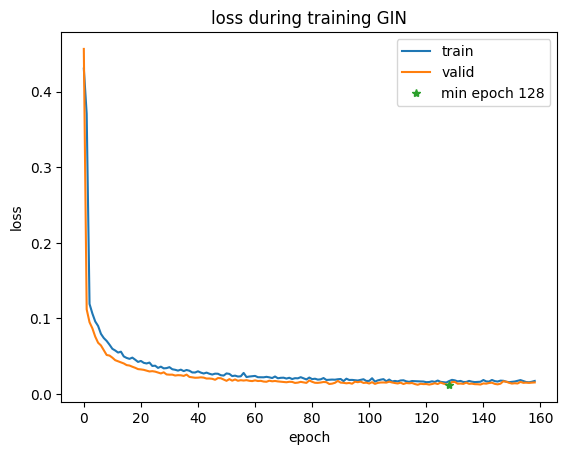

load pretrained model from  Kp+AD4/GIN_MT_0.pt
[Test] Loss: 0.022
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.842  &0.715  &0.840  &0.974  &0.456  &0.902 &0.883 &0.547 &0.949


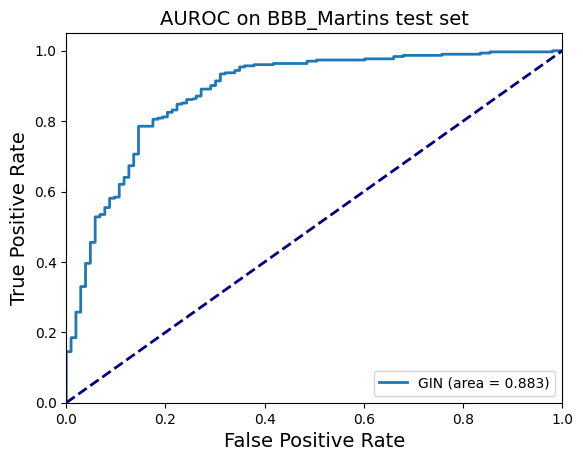

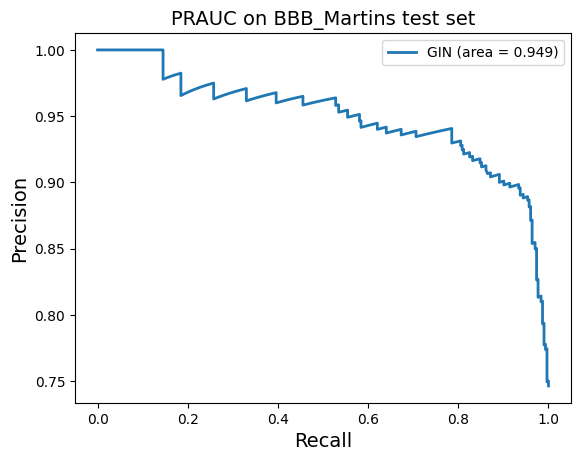


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.791 &  nan &0.943


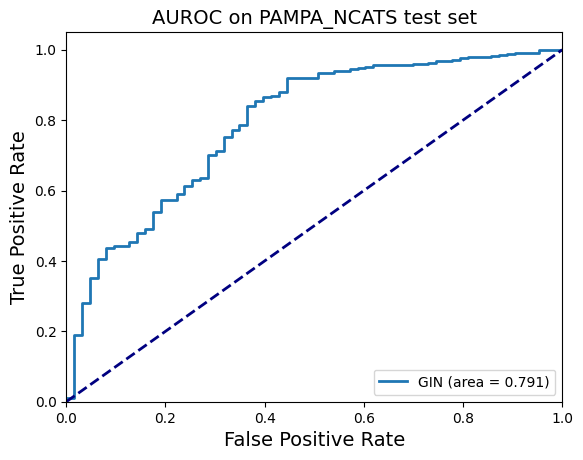

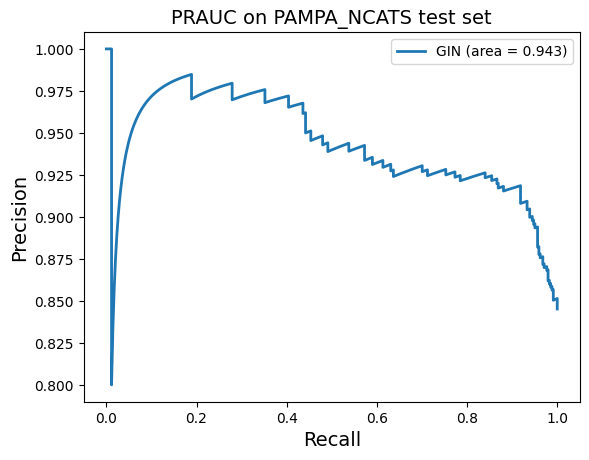


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.617  &0.598  &0.773  &0.596


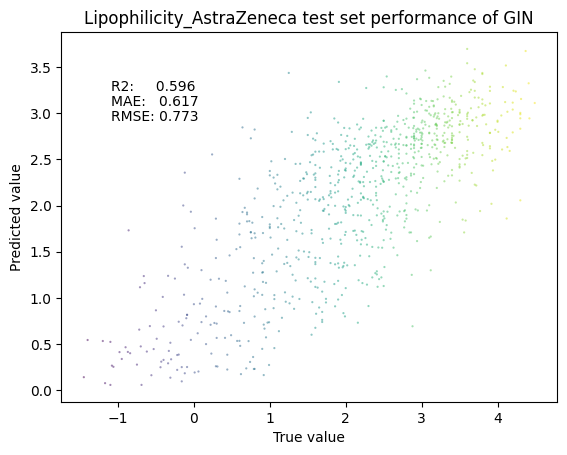


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.082  &2.016  &1.420  &0.629


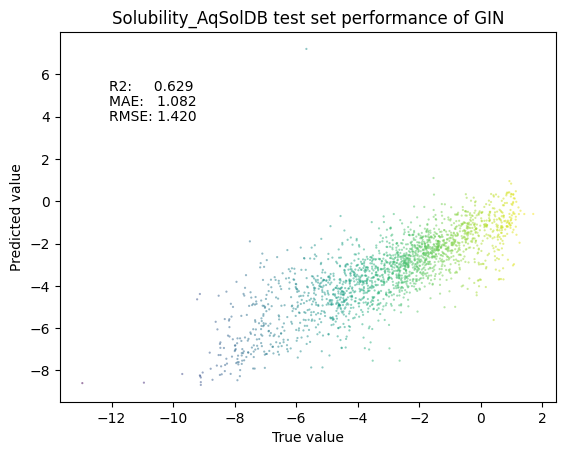


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.344  &114.496  &10.700  &0.394


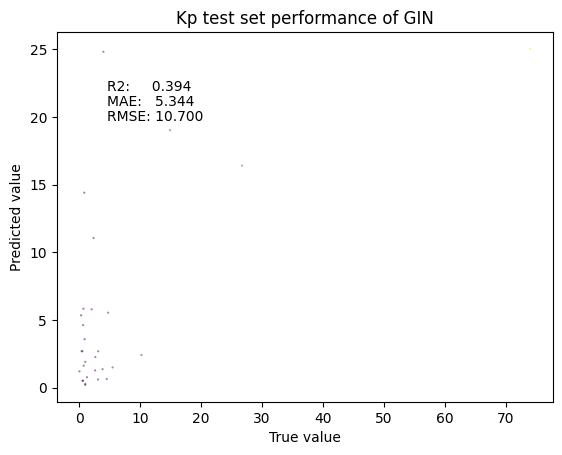



--> Train status saved at Kp+AD4/GIN_MT_0.yml
Finished evaluate test performance, outputs performance dict

Run # 1 for GIN MT	 | save dir:  Kp+AD4/GIN_MT_1 | 	cannot open Kp+AD4/GIN_MT_1.yml, retrain


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:01<00:00, 4.25MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978801
Start training GIN...
Epoch:0 [Train] Loss: 0.535 | [Valid] Loss: 0.523	SAVE MODEL: loss: inf -> 0.523 | runtime: 2.359 ms
Epoch:1 [Train] Loss: 0.437 | [Valid] Loss: 0.144	SAVE MODEL: loss: 0.523 -> 0.144 | runtime: 2.352 ms
Epoch:2 [Train] Loss: 0.141 | [Valid] Loss: 0.111	SAVE MODEL: loss: 0.144 -> 0.111 | runtime: 2.354 ms
Epoch:3 [Train] Loss: 0.124 | [Valid] Loss: 0.096	SAVE MODEL: loss: 0.111 -> 0.096 | runtime: 2.361 ms
Epoch:4 [Train] Loss: 0.107 | [Valid] Loss: 0.087	SAVE MODEL: loss: 0.096 -> 0.087 | runtime: 2.365 ms
Epoch:5 [Train] Loss: 0.102 | [Valid] Loss: 0.077	SAVE MODEL: loss: 0.087 -> 0.077 | runtime: 2.368 ms
Epoch:6 [Train] Loss: 0.090 | [Valid] Loss: 0.071	SAVE MODEL: loss: 0.077 -> 0.071 | runtime: 2.358 ms
Epoch:7 [Train] Loss: 0.087 | [Valid] Loss: 0.069	SAVE MODEL: loss: 0.071 -> 0.069 | runtime: 2.354 ms
Epoch:8 [Train] Loss: 0.080 | [Valid] Loss: 0.064	SAVE MODEL: loss: 0.069 -> 0.064 | r

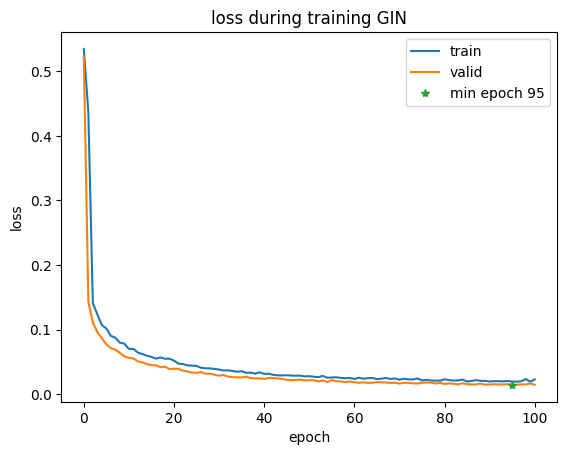

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.862  &0.725  &0.844  &1.000  &0.451  &0.916 &0.916 &0.617 &0.962

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.761 &  nan &0.923

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.590  &0.534  &0.731  &0.629

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.033  &1.947  &1.395  &0.633

*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.219  &69.942  &8.363  &0.599

Epoch:101 [Train] Loss: 0.022 | [Valid] Loss: 0.015	EarlyStopping counter: 6 out of 30
Epoch:102 [Train] Loss: 0.020 | [Valid] Loss: 0.015	EarlyStopping counter: 7 out of 30
Epoch:103 [Train] Loss: 0.019 | [Valid] Loss: 0.015	EarlyStopping counter: 8 out of 30
Epoch:104 [Train] Loss: 0.019 | [Valid] Loss: 0.015	E

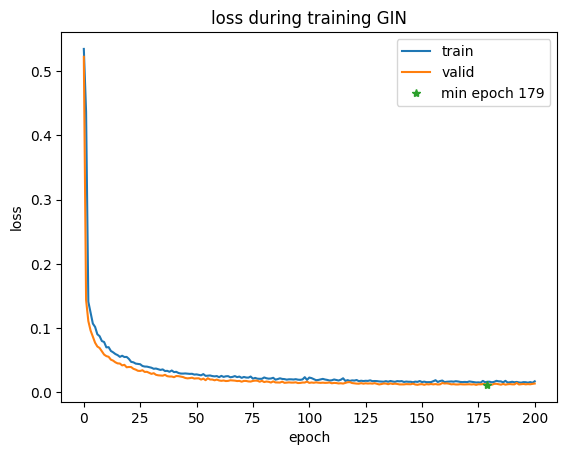

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.887  &0.794  &0.882  &0.980  &0.608  &0.928 &0.935 &0.683 &0.974

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.801 &  nan &0.941

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.571  &0.500  &0.707  &0.652

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.990  &1.775  &1.332  &0.666

*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.370  &108.100  &10.397  &0.380

Epoch:201 [Train] Loss: 0.015 | [Valid] Loss: 0.012	EarlyStopping counter: 22 out of 30
Epoch:202 [Train] Loss: 0.014 | [Valid] Loss: 0.012	EarlyStopping counter: 23 out of 30
Epoch:203 [Train] Loss: 0.015 | [Valid] Loss: 0.012	EarlyStopping counter: 24 out of 30
Epoch:204 [Train] Loss: 0.014 | [Valid] Loss: 0.

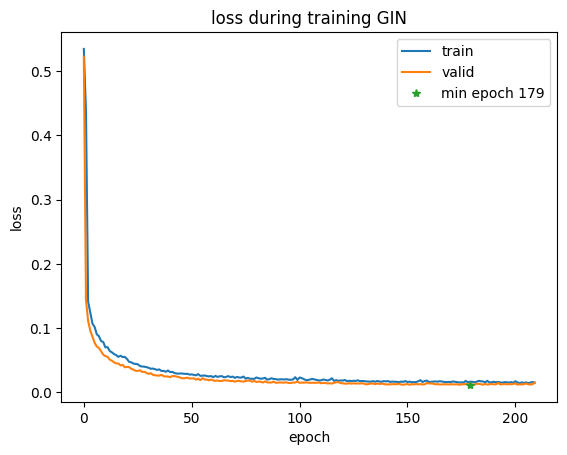

load pretrained model from  Kp+AD4/GIN_MT_1.pt
[Test] Loss: 0.020
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.869  &0.765  &0.865  &0.977  &0.553  &0.918 &0.911 &0.633 &0.963


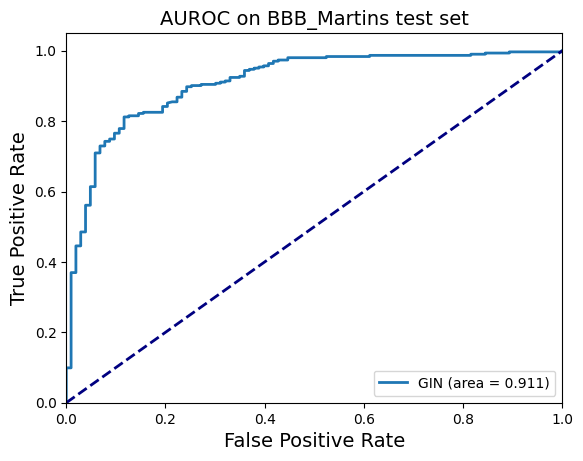

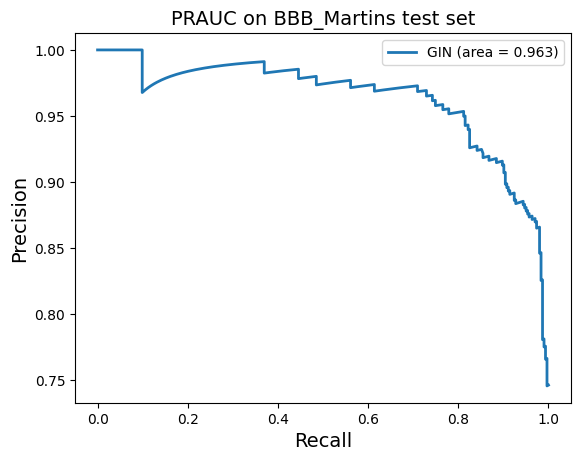


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.810 &  nan &0.949


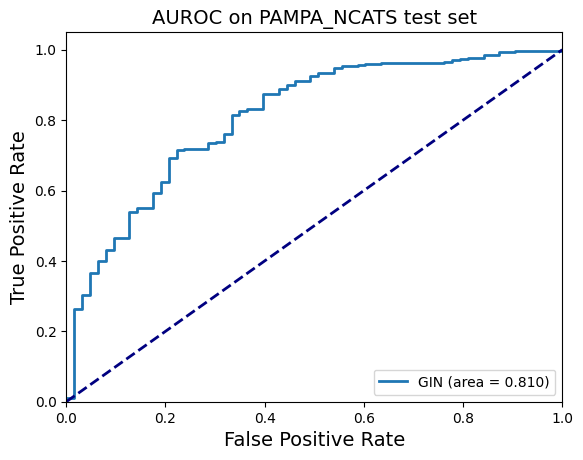

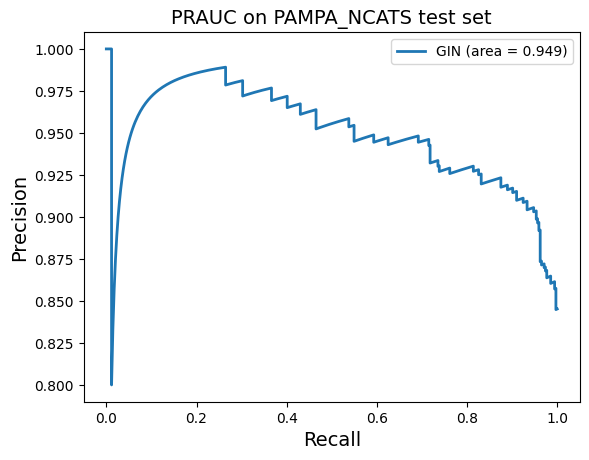


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.599  &0.580  &0.762  &0.608


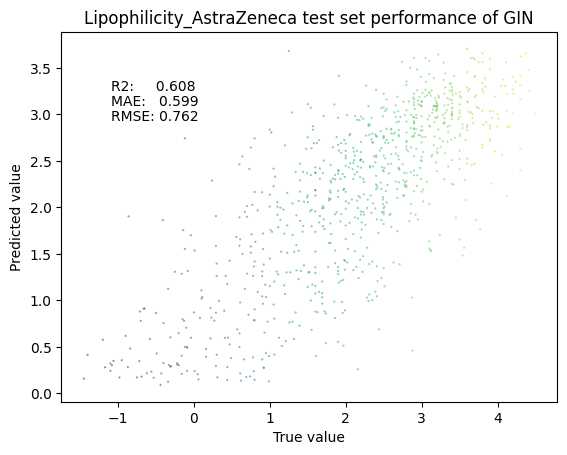


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.018  &2.044  &1.430  &0.623


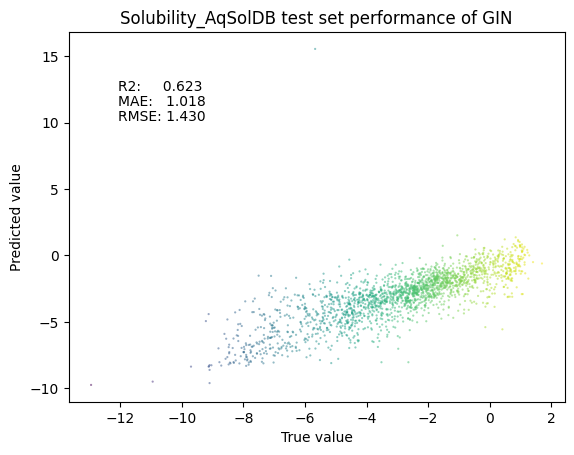


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.413  &124.107  &11.140  &0.343


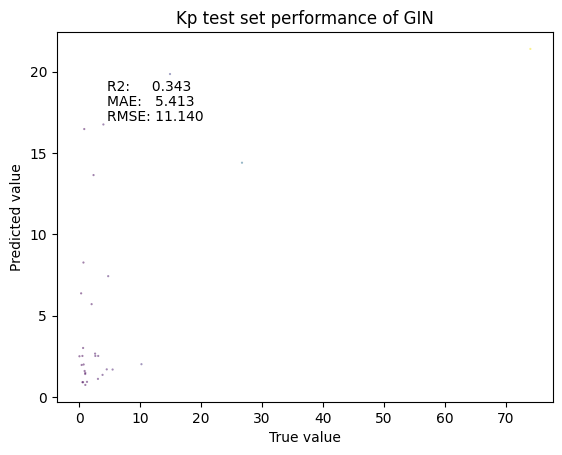



--> Train status saved at Kp+AD4/GIN_MT_1.yml
Finished evaluate test performance, outputs performance dict

Run # 2 for GIN MT	 | save dir:  Kp+AD4/GIN_MT_2 | 	cannot open Kp+AD4/GIN_MT_2.yml, retrain


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:01<00:00, 5.94MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978801
Start training GIN...
Epoch:0 [Train] Loss: 0.494 | [Valid] Loss: 0.537	SAVE MODEL: loss: inf -> 0.537 | runtime: 2.349 ms
Epoch:1 [Train] Loss: 0.470 | [Valid] Loss: 0.114	SAVE MODEL: loss: 0.537 -> 0.114 | runtime: 2.332 ms
Epoch:2 [Train] Loss: 0.114 | [Valid] Loss: 0.092	SAVE MODEL: loss: 0.114 -> 0.092 | runtime: 2.331 ms
Epoch:3 [Train] Loss: 0.100 | [Valid] Loss: 0.081	SAVE MODEL: loss: 0.092 -> 0.081 | runtime: 2.337 ms
Epoch:4 [Train] Loss: 0.090 | [Valid] Loss: 0.075	SAVE MODEL: loss: 0.081 -> 0.075 | runtime: 2.331 ms
Epoch:5 [Train] Loss: 0.084 | [Valid] Loss: 0.068	SAVE MODEL: loss: 0.075 -> 0.068 | runtime: 2.356 ms
Epoch:6 [Train] Loss: 0.077 | [Valid] Loss: 0.061	SAVE MODEL: loss: 0.068 -> 0.061 | runtime: 2.352 ms
Epoch:7 [Train] Loss: 0.072 | [Valid] Loss: 0.056	SAVE MODEL: loss: 0.061 -> 0.056 | runtime: 2.334 ms
Epoch:8 [Train] Loss: 0.064 | [Valid] Loss: 0.053	SAVE MODEL: loss: 0.056 -> 0.053 | r

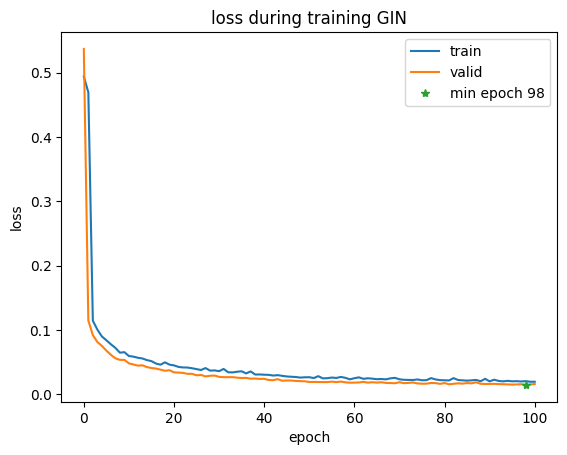

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.882  &0.771  &0.868  &0.993  &0.549  &0.926 &0.914 &0.672 &0.958

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.764 &  nan &0.924

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.615  &0.575  &0.758  &0.600

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.095  &2.099  &1.449  &0.604

*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.110  &93.282  &9.658  &0.465

Epoch:101 [Train] Loss: 0.024 | [Valid] Loss: 0.016	EarlyStopping counter: 3 out of 30
Epoch:102 [Train] Loss: 0.021 | [Valid] Loss: 0.016	EarlyStopping counter: 4 out of 30
Epoch:103 [Train] Loss: 0.019 | [Valid] Loss: 0.016	EarlyStopping counter: 5 out of 30
Epoch:104 [Train] Loss: 0.021 | [Valid] Loss: 0.017	E

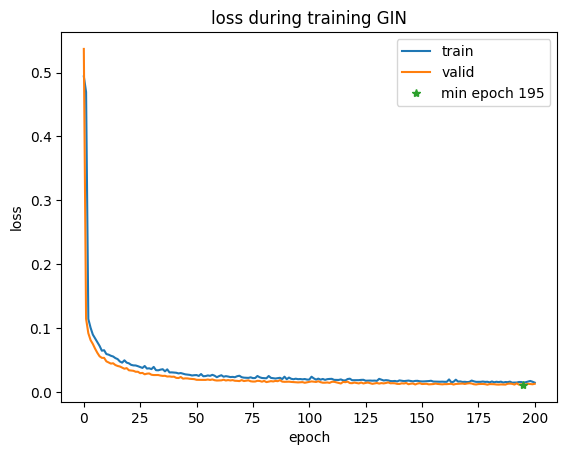

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.916  &0.846  &0.909  &0.987  &0.706  &0.946 &0.934 &0.770 &0.973

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.788 &  nan &0.939

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.562  &0.478  &0.691  &0.668

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.004  &1.842  &1.357  &0.653

*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.535  &69.988  &8.366  &0.599

Epoch:201 [Train] Loss: 0.015 | [Valid] Loss: 0.012	EarlyStopping counter: 6 out of 30
Epoch:202 [Train] Loss: 0.016 | [Valid] Loss: 0.012	EarlyStopping counter: 7 out of 30
Epoch:203 [Train] Loss: 0.015 | [Valid] Loss: 0.011	EarlyStopping counter: 8 out of 30
Epoch:204 [Train] Loss: 0.016 | [Valid] Loss: 0.011	E

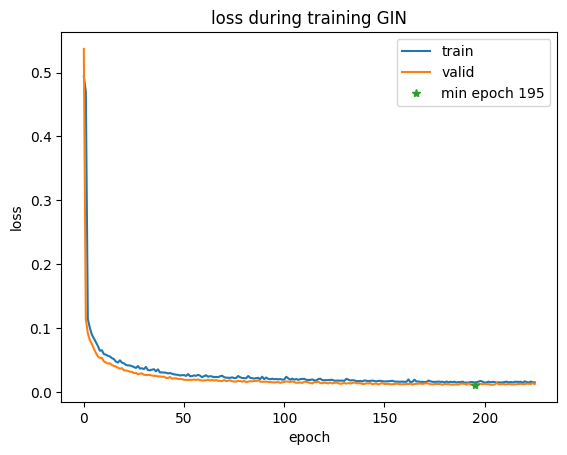

load pretrained model from  Kp+AD4/GIN_MT_2.pt
[Test] Loss: 0.021
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.855  &0.752  &0.861  &0.960  &0.544  &0.908 &0.902 &0.587 &0.960


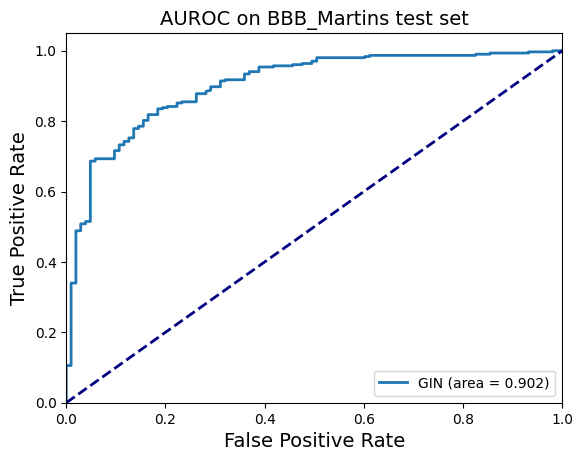

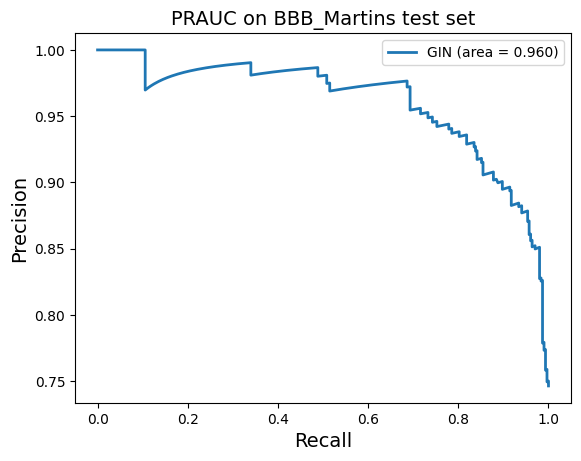


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.789 &  nan &0.946


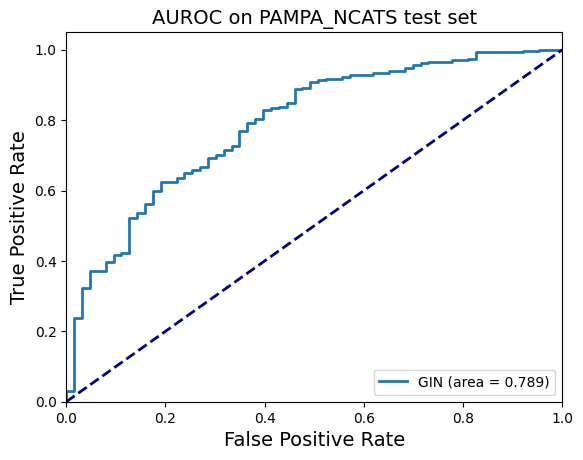

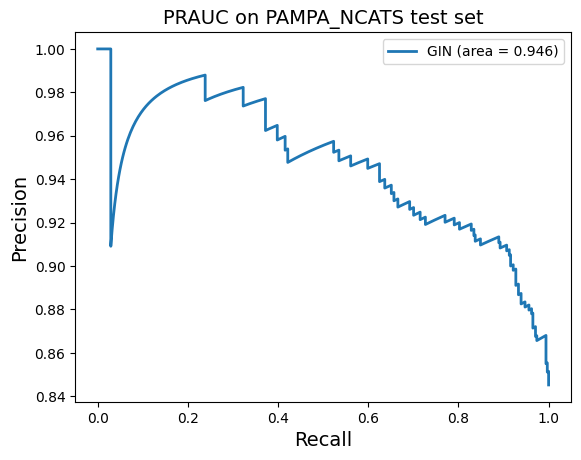


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.576  &0.544  &0.738  &0.633


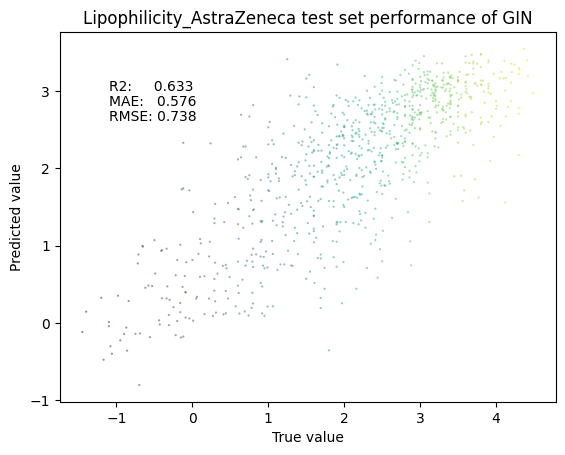


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.994  &1.936  &1.391  &0.643


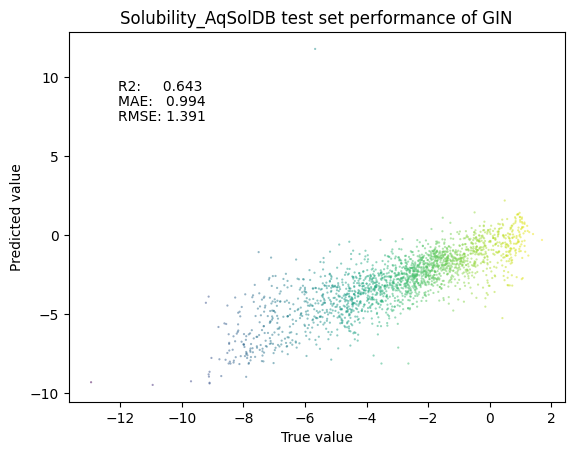


*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.049  &111.273  &10.549  &0.411


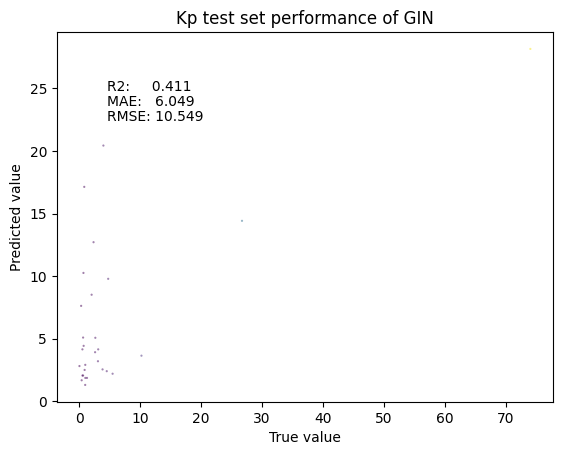

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!




--> Train status saved at Kp+AD4/GIN_MT_2.yml
Finished evaluate test performance, outputs performance dict
repeated num # 3 idx 1 has the lowest loss
******************** BBB_Martins ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.856$\pm$0.011  &0.744$\pm$0.021  &0.856$\pm$0.011  &0.970$\pm$0.007  &0.518$\pm$0.044  &0.909$\pm$0.006  &0.899$\pm$0.011  &0.589$\pm$0.035  &0.958$\pm$0.006  
 idx 1: &0.869            &0.765            &0.865            &0.977            &0.553            &0.918            &0.911            &0.633            &0.963            

******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.845$\pm$0.000  &0.500$\pm$0.000  &0.845$\pm$0.000  &1.000$\pm$0.000  &0.000$\pm$0.

Found local copy...
Loading...
Done!



START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138

START scaling train valid test data set: 
---> scale Kp | min 0.014 | max 135.460
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5], 'Solubility_AqSolDB': [-13.1719, 2.1376816201], 'Kp': [0.0139545499259114, 135.4599736770797]} 

---> loader for ['BBB_Martins', 'PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB', 'Kp']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
Model type:  RNN | Model parameters:  2981257
Start training RNN...
Epoch:0 [Train] Loss: 0.248 | [Valid] Loss: 0.296	SAVE MODEL: loss: inf -> 0.296 | runtime: 1.246 ms
Epoch:1 [Train] Loss: 0.277 | [Valid] Loss: 0.105	SAVE MODEL: loss: 0.296 -> 0.105 | runtime: 1.256 ms
Epoch:2 [Train] Loss

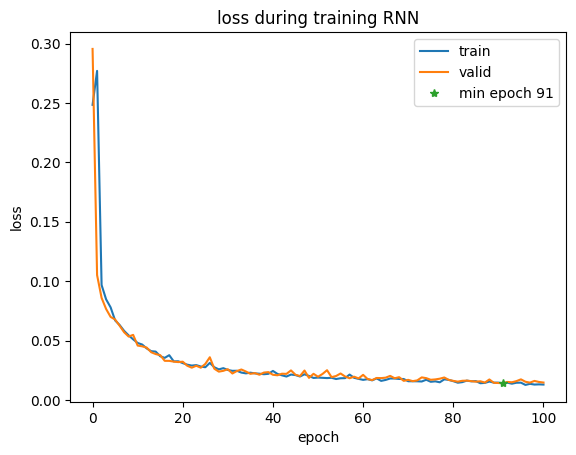

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.892  &0.823  &0.901  &0.961  &0.686  &0.930 &0.934 &0.699 &0.977

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.687 &  nan &0.909

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.725  &0.828  &0.910  &0.424

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.893  &1.496  &1.223  &0.718

*************** Kp ***************
  MAE     MSE     RMSE    R2
&8.130  &166.903  &12.919  &0.043

Epoch:101 [Train] Loss: 0.013 | [Valid] Loss: 0.014	EarlyStopping counter: 10 out of 30
Epoch:102 [Train] Loss: 0.013 | [Valid] Loss: 0.015	EarlyStopping counter: 11 out of 30
Epoch:103 [Train] Loss: 0.012 | [Valid] Loss: 0.015	EarlyStopping counter: 12 out of 30
Epoch:104 [Train] Loss: 0.013 | [Valid] Loss: 0.

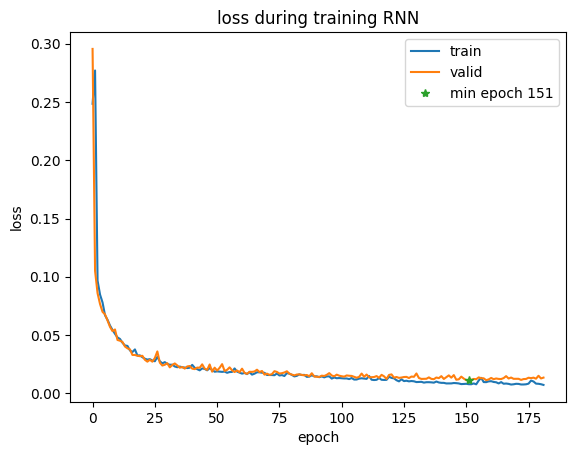

load pretrained model from  Kp+AD4/RNN_MT_0.pt
[Test] Loss: 0.025
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.840  &0.717  &0.842  &0.967  &0.466  &0.900 &0.858 &0.538 &0.940


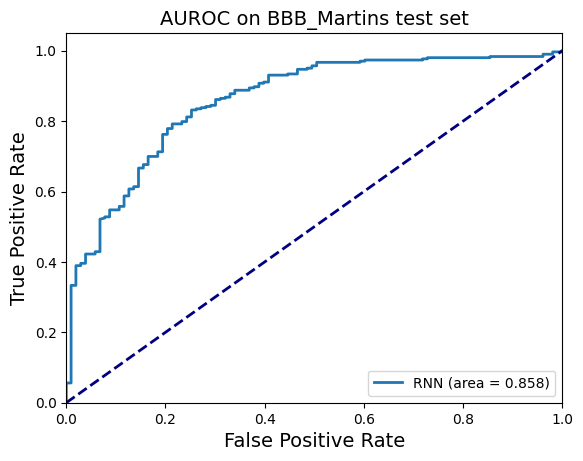

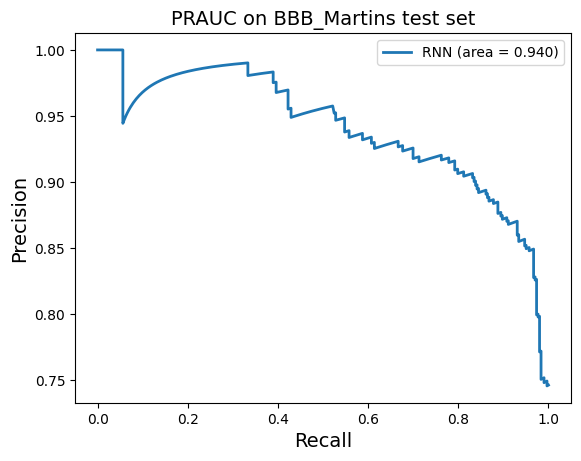


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.519  &0.850  &0.991  &0.048  &0.915 &0.740 &0.117 &0.931


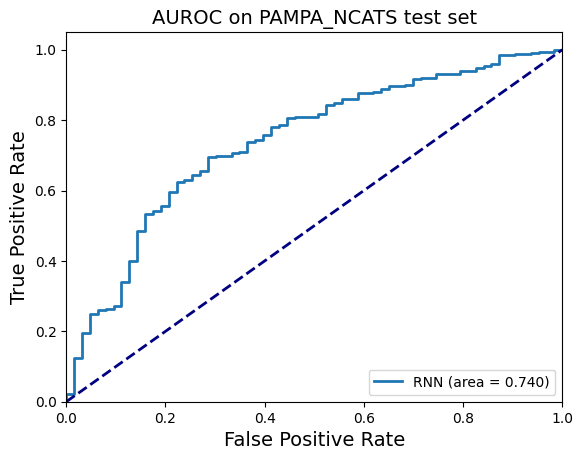

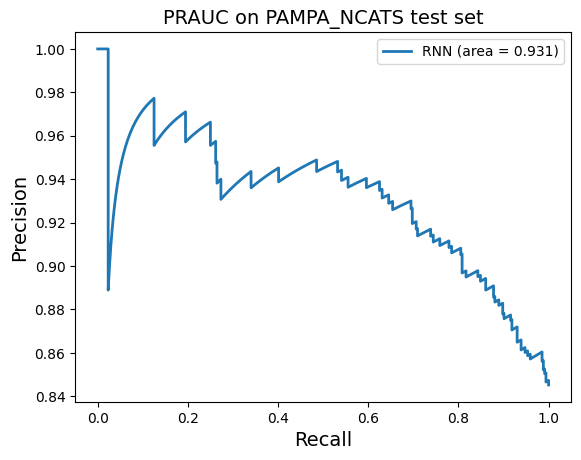


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.660  &0.737  &0.859  &0.502


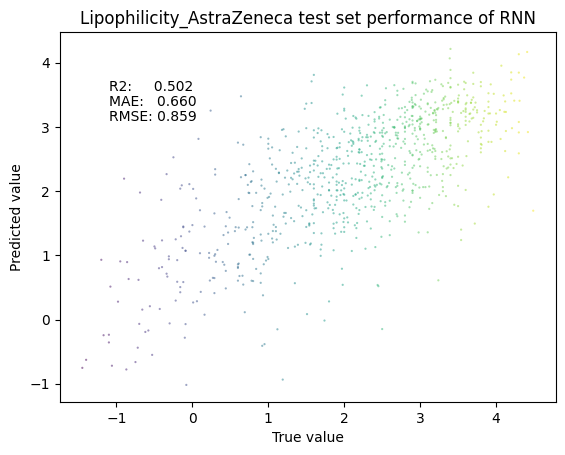


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.819  &1.333  &1.155  &0.754


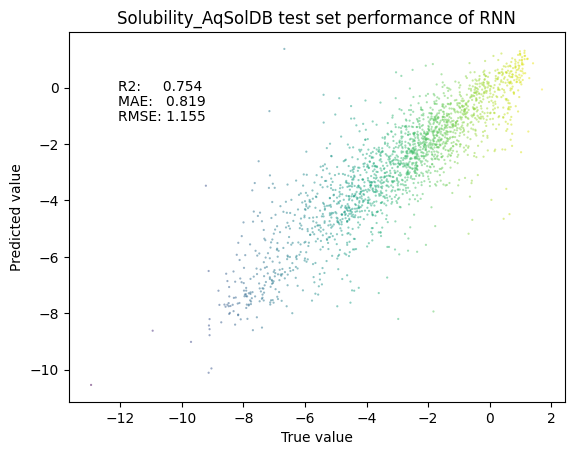


*************** Kp ***************
  MAE     MSE     RMSE    R2
&5.878  &162.308  &12.740  &0.141


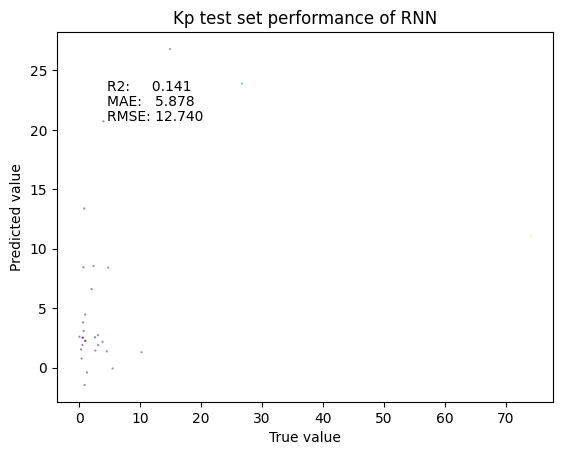



--> Train status saved at Kp+AD4/RNN_MT_0.yml
Finished evaluate test performance, outputs performance dict

Run # 1 for RNN MT	 | save dir:  Kp+AD4/RNN_MT_1 | 	cannot open Kp+AD4/RNN_MT_1.yml, retrain
Model type:  RNN | Model parameters:  2981257
Start training RNN...
Epoch:0 [Train] Loss: 0.260 | [Valid] Loss: 0.292	SAVE MODEL: loss: inf -> 0.292 | runtime: 1.355 ms
Epoch:1 [Train] Loss: 0.282 | [Valid] Loss: 0.104	SAVE MODEL: loss: 0.292 -> 0.104 | runtime: 1.369 ms
Epoch:2 [Train] Loss: 0.101 | [Valid] Loss: 0.092	SAVE MODEL: loss: 0.104 -> 0.092 | runtime: 1.328 ms
Epoch:3 [Train] Loss: 0.085 | [Valid] Loss: 0.085	SAVE MODEL: loss: 0.092 -> 0.085 | runtime: 1.343 ms
Epoch:4 [Train] Loss: 0.078 | [Valid] Loss: 0.076	SAVE MODEL: loss: 0.085 -> 0.076 | runtime: 1.357 ms
Epoch:5 [Train] Loss: 0.069 | [Valid] Loss: 0.065	SAVE MODEL: loss: 0.076 -> 0.065 | runtime: 1.344 ms
Epoch:6 [Train] Loss: 0.064 | [Valid] Loss: 0.060	SAVE MODEL: loss: 0.065 -> 0.060 | runtime: 1.335 ms
Epoch:7 [T

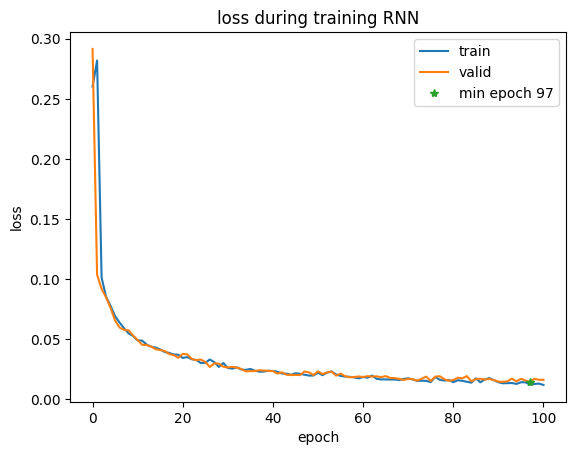

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.877  &0.787  &0.880  &0.967  &0.608  &0.922 &0.920 &0.653 &0.969

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.667 &  nan &0.905

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.757  &0.898  &0.948  &0.375

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.968  &1.709  &1.307  &0.678

*************** Kp ***************
  MAE     MSE     RMSE    R2
&8.004  &192.882  &13.888  &-0.105

Epoch:101 [Train] Loss: 0.012 | [Valid] Loss: 0.015	EarlyStopping counter: 4 out of 30
Epoch:102 [Train] Loss: 0.012 | [Valid] Loss: 0.015	EarlyStopping counter: 5 out of 30
Epoch:103 [Train] Loss: 0.012 | [Valid] Loss: 0.014	SAVE MODEL: loss: 0.014 -> 0.014 | runtime: 1.339 ms
Epoch:104 [Train] Loss: 0.012 | 

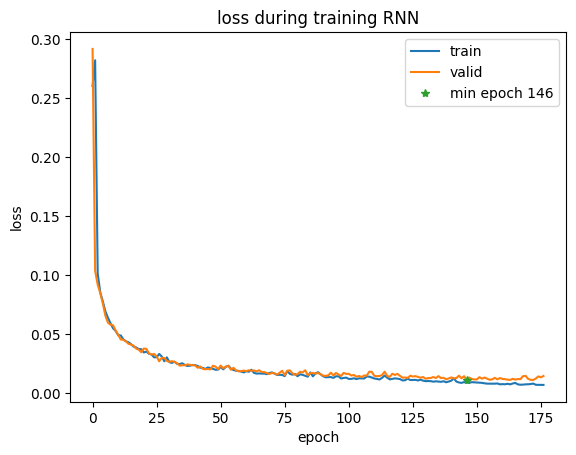

load pretrained model from  Kp+AD4/RNN_MT_1.pt
[Test] Loss: 0.023
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.820  &0.694  &0.832  &0.950  &0.437  &0.888 &0.870 &0.475 &0.940


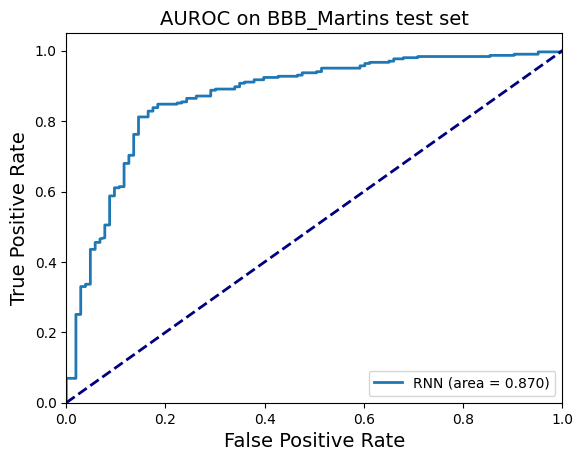

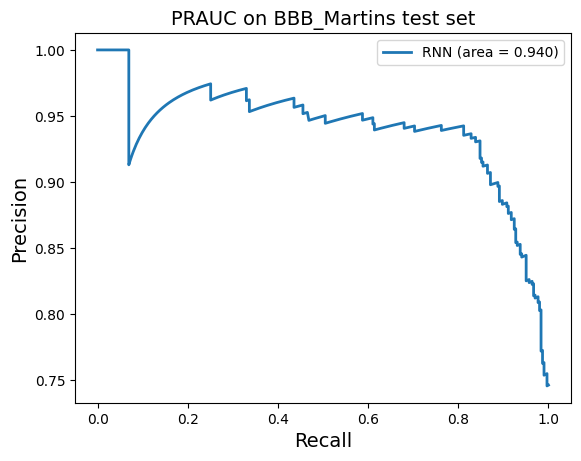


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.843  &0.505  &0.847  &0.994  &0.016  &0.914 &0.752 &0.043 &0.944


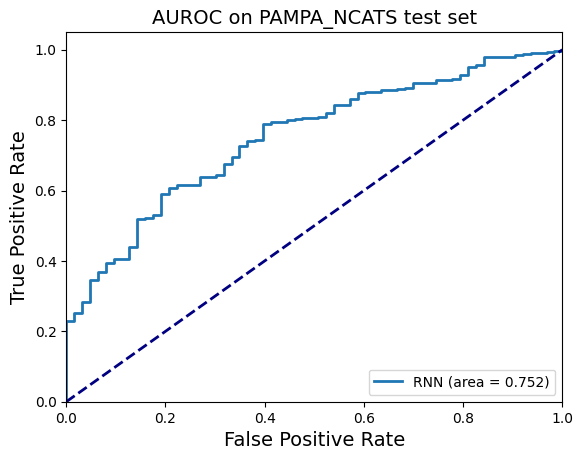

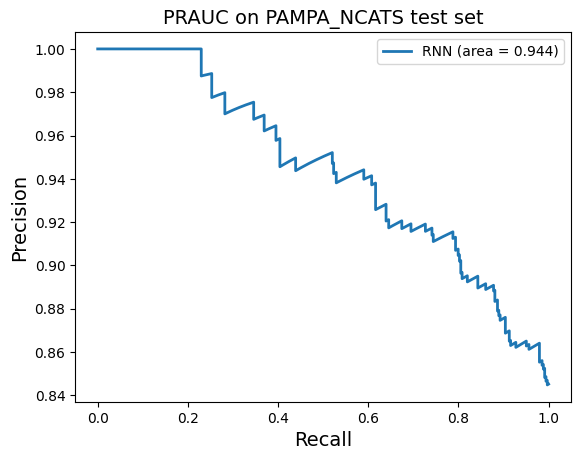


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.641  &0.687  &0.829  &0.536


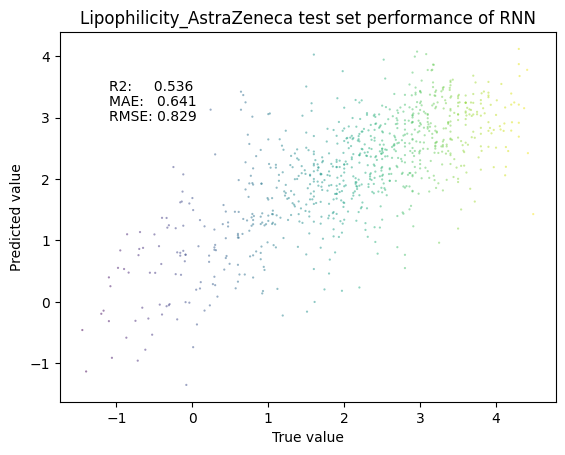


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.823  &1.334  &1.155  &0.754


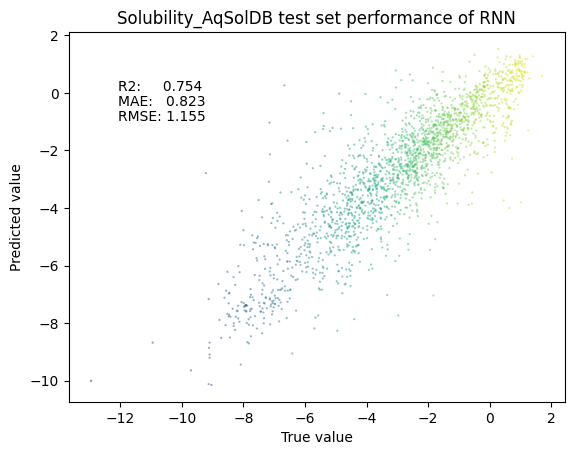


*************** Kp ***************
  MAE     MSE     RMSE    R2
&6.319  &185.321  &13.613  &0.019


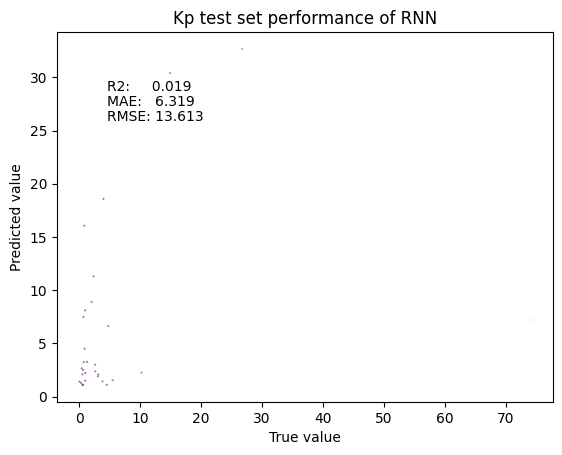



--> Train status saved at Kp+AD4/RNN_MT_1.yml
Finished evaluate test performance, outputs performance dict

Run # 2 for RNN MT	 | save dir:  Kp+AD4/RNN_MT_2 | 	cannot open Kp+AD4/RNN_MT_2.yml, retrain
Model type:  RNN | Model parameters:  2981257
Start training RNN...
Epoch:0 [Train] Loss: 0.248 | [Valid] Loss: 0.291	SAVE MODEL: loss: inf -> 0.291 | runtime: 1.349 ms
Epoch:1 [Train] Loss: 0.278 | [Valid] Loss: 0.107	SAVE MODEL: loss: 0.291 -> 0.107 | runtime: 1.342 ms
Epoch:2 [Train] Loss: 0.099 | [Valid] Loss: 0.089	SAVE MODEL: loss: 0.107 -> 0.089 | runtime: 1.346 ms
Epoch:3 [Train] Loss: 0.086 | [Valid] Loss: 0.085	SAVE MODEL: loss: 0.089 -> 0.085 | runtime: 1.328 ms
Epoch:4 [Train] Loss: 0.079 | [Valid] Loss: 0.079	SAVE MODEL: loss: 0.085 -> 0.079 | runtime: 1.336 ms
Epoch:5 [Train] Loss: 0.071 | [Valid] Loss: 0.068	SAVE MODEL: loss: 0.079 -> 0.068 | runtime: 1.354 ms
Epoch:6 [Train] Loss: 0.063 | [Valid] Loss: 0.061	SAVE MODEL: loss: 0.068 -> 0.061 | runtime: 1.339 ms
Epoch:7 [T

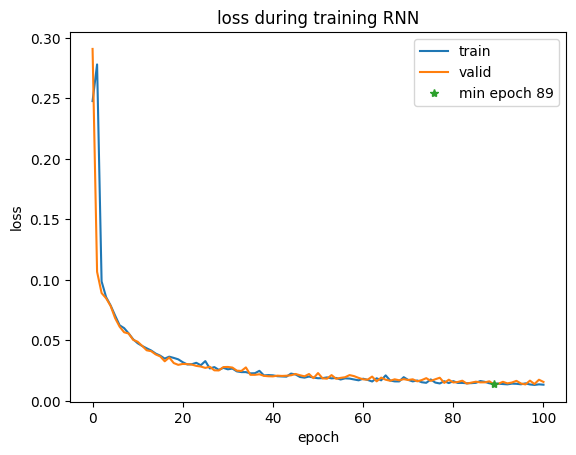

*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.906  &0.840  &0.908  &0.974  &0.706  &0.940 &0.931 &0.741 &0.974

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.512  &0.841  &0.994  &0.030  &0.911 &0.693 &0.091 &0.905

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.765  &0.927  &0.963  &0.355

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.915  &1.609  &1.268  &0.697

*************** Kp ***************
  MAE     MSE     RMSE    R2
&8.087  &215.908  &14.694  &-0.237

Epoch:101 [Train] Loss: 0.015 | [Valid] Loss: 0.015	EarlyStopping counter: 12 out of 30
Epoch:102 [Train] Loss: 0.014 | [Valid] Loss: 0.014	EarlyStopping counter: 13 out of 30
Epoch:103 [Train] Loss: 0.015 | [Valid] Loss: 0.015	EarlyStopping counter: 14 out of 30
Epoch:104 [Train] Loss: 0.012 | [Valid] Loss: 0

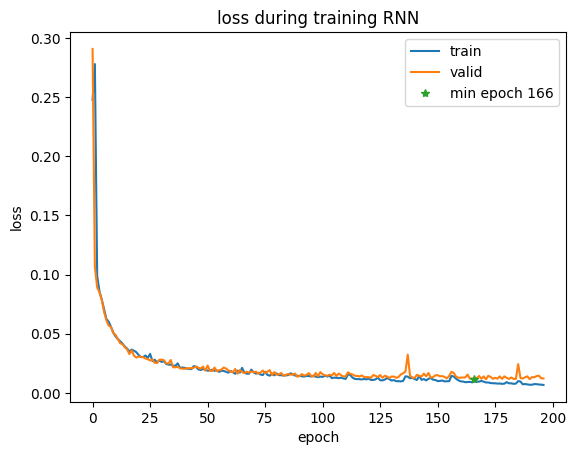

load pretrained model from  Kp+AD4/RNN_MT_2.pt
[Test] Loss: 0.023
*************** BBB_Martins ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.840  &0.729  &0.850  &0.954  &0.505  &0.899 &0.878 &0.541 &0.951


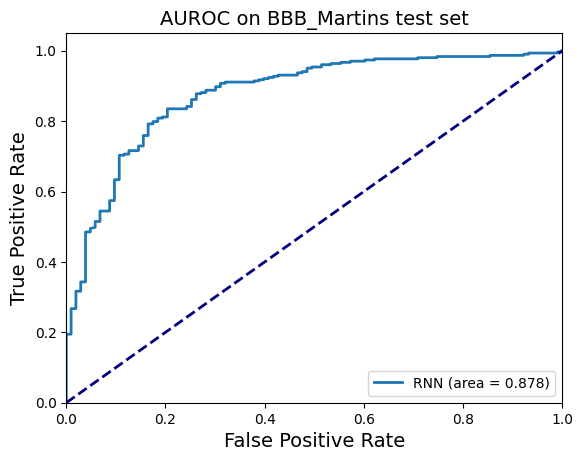

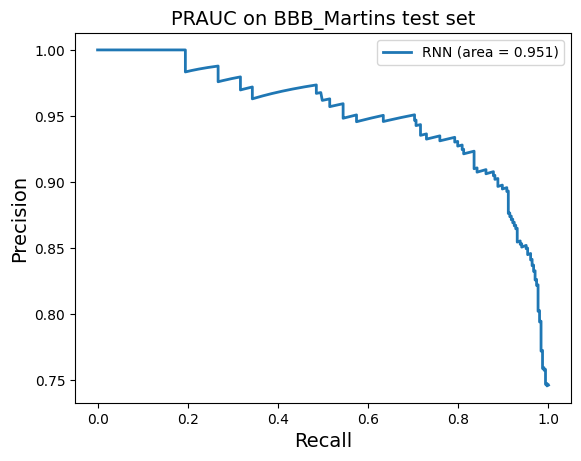


*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.850  &0.516  &0.849  &1.000  &0.032  &0.919 &0.737 &0.164 &0.931


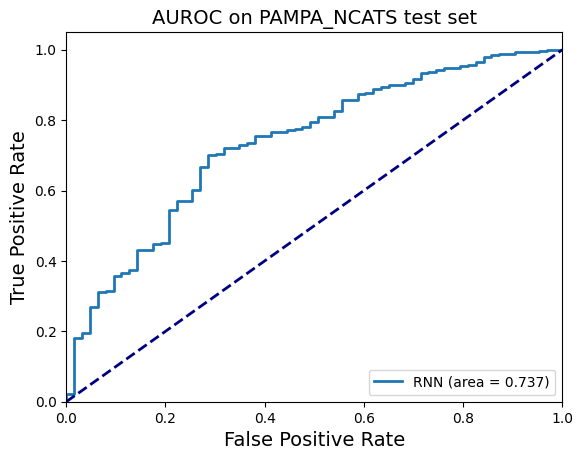

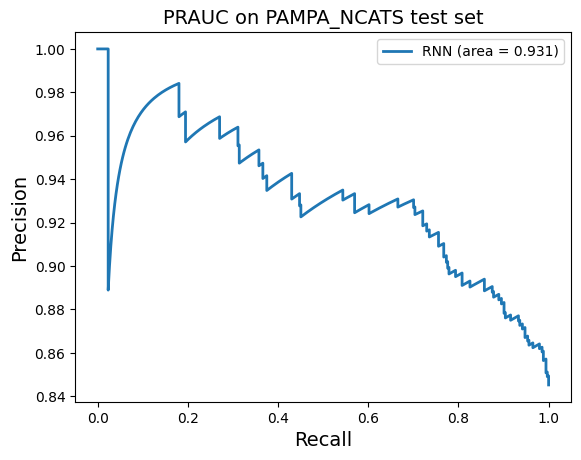


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.641  &0.694  &0.833  &0.531


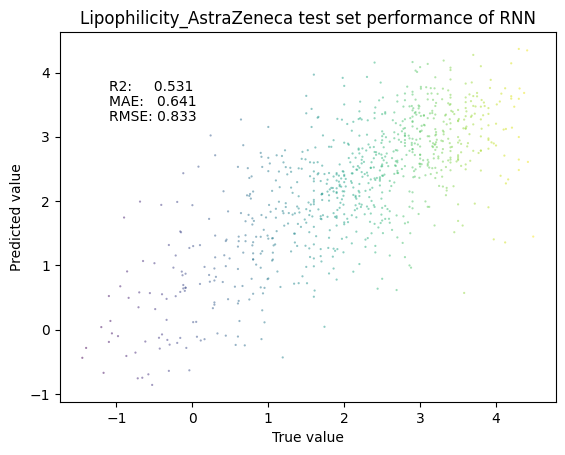


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.896  &1.570  &1.253  &0.711


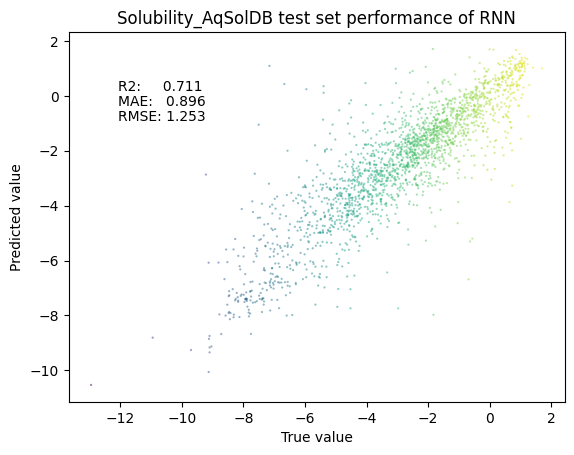


*************** Kp ***************
  MAE     MSE     RMSE    R2
&7.021  &212.542  &14.579  &-0.125


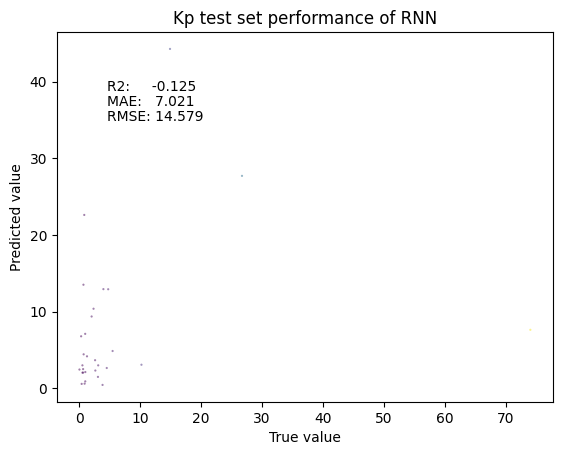



--> Train status saved at Kp+AD4/RNN_MT_2.yml
Finished evaluate test performance, outputs performance dict
repeated num # 3 idx 2 has the lowest loss
******************** BBB_Martins ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.833$\pm$0.009  &0.713$\pm$0.015  &0.841$\pm$0.007  &0.957$\pm$0.007  &0.469$\pm$0.028  &0.896$\pm$0.006  &0.868$\pm$0.008  &0.518$\pm$0.031  &0.944$\pm$0.005  
 idx 2: &0.840            &0.729            &0.850            &0.954            &0.505            &0.899            &0.878            &0.541            &0.951            

******************** PAMPA_NCATS ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.846$\pm$0.003  &0.513$\pm$0.006  &0.849$\pm$0.002  &0.995$\pm$0.004  &0.032$\pm$0.

In [ ]:
names = names_AD + ['Kp']

for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    p = train_mt(names, model_type, 'Kp+AD4', repeat_time=3, retrain=False, uw=True)

['BBB_Martins',
 'PAMPA_NCATS',
 'Lipophilicity_AstraZeneca',
 'Solubility_AqSolDB']